# Start-Up Funding Analysis

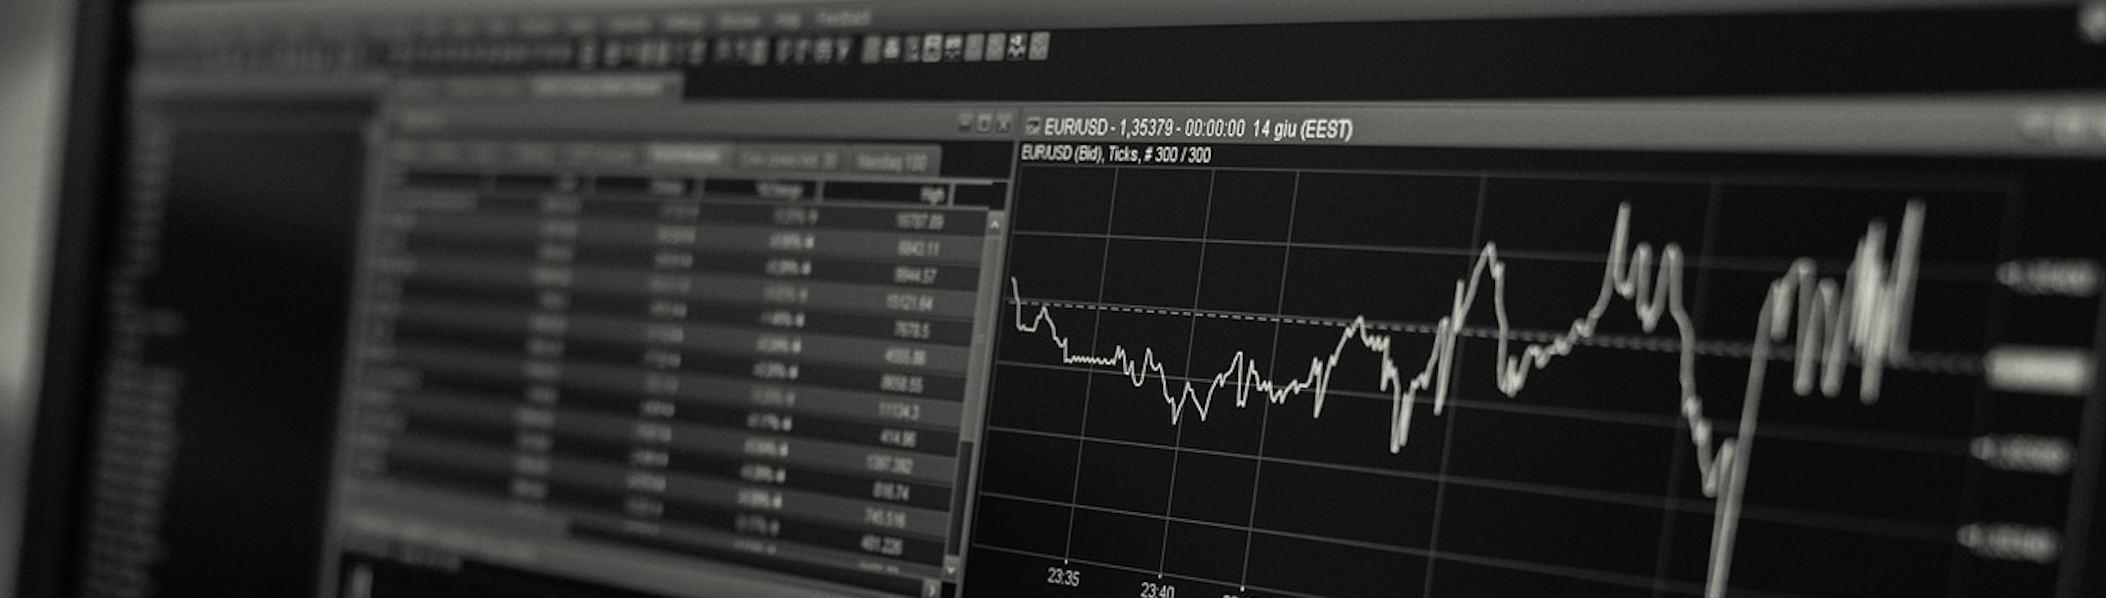

## Introduction
An descriptive analysis on the development of start-up funding between 1995-2015. We will deep dive into and dissect the data to find out the how start-ups have developed, what the major trends are and which markets have been the most dominant.

## Table of contents:
- Imports
- Data description
- Data pre-processing
- Data exploration
- Additional data
- Summary
- Bibliography

## Imports
Importing the libraries and packages used for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from datetime import datetime
from itertools import groupby
import matplotlib.ticker as ticker

## Data Description
#### Attribute Information
- `permalink` -  Unique organisation identifier
- `name` -  Name of the organisation
- `homepage_url` -  URL to organisation website
- `category_list` -  Categories to which the organisation belongs to
- `market` -  Market in which an organisation operates
- `funding_total_usd` -  Total amount of funding received (in USD)
- `status` -  Current status (e.g., acquired)
- `country_code` -  Country code of headquarters
- `state_code` -  US state code of headquarters
- `region` -  Within-country region of headquarters
- `city` -  City of headquarters
- `funding rounds` -  Number of funding rounds participated in as the receiving party
- `founded_at` - Date of founding
- `first_funding_at` -  Date of first funding
- `last_funding_at` -  Date of last funding

## Data Pre-Processing
Before proceeding on to analyzing the data, it is important to prepare and pre-process the data. This includes handling the missing values, if any, and making sure each feature has the correct datatype.

In [2]:
df = pd.read_csv("../data/organisations.csv")
df.head(5)

permalink                name  \
0           /organization/waywire            #waywire   
1   /organization/rock-your-paper   'Rock' Your Paper   
2  /organization/in-touch-network   (In)Touch Network   
3  /organization/r-ranch-and-mine  -R- Ranch and Mine   
4      /organization/club-domains       .Club Domains   

                    homepage_url  \
0         http://www.waywire.com   
1   http://www.rockyourpaper.org   
2  http://www.InTouchNetwork.com   
3                            NaN   
4               http://nic.club/   

                                       category_list         market  \
0         |Entertainment|Politics|Social Media|News|          News    
1                             |Publishing|Education|    Publishing    
2  |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
3                      |Tourism|Entertainment|Games|       Tourism    
4                                         |Software|      Software    

   funding_total_usd     status country_code state_code          region  \
0          1750000.0   acquired          USA         NY   New York City   
1            40000.0  operating          EST        NaN         Tallinn   
2          1500000.0  operating          GBR        NaN          London   
3            60000.0  operating          USA         TX          Dallas   
4          7000000.0        NaN          USA         FL  Ft. Lauderdale   

           city  funding_rounds           founded_at     first_funding_at  \
0      New York               1  2012-06-01 00:00:00  2012-06-30 00:00:00   
1       Tallinn               1  2012-10-26 00:00:00  2012-08-09 00:00:00   
2        London               1  2011-04-01 00:00:00  2011-04-01 00:00:00   
3    Fort Worth               2  2014-01-01 00:00:00  2014-08-17 00:00:00   
4  Oakland Park               1  2011-10-10 00:00:00  2013-05-31 00:00:00   

       last_funding_at  
0  2012-06-30 00:00:00  
1  2012-08-09 00:00:00  
2  2011-04-01 00:00:00  
3  2014-09-26 00:00:00  
4  2013-05-31 00:00:00

`.info()` prints information about the dataframe, including non-null values and datatypes. As shown above, there are some null values in the dataframe that will need to be treated. Some of the features also appear to have an incorrect datatype. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28729 entries, 0 to 28728
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          28729 non-null  object 
 1   name               28729 non-null  object 
 2   homepage_url       27563 non-null  object 
 3   category_list      27898 non-null  object 
 4   market             27896 non-null  object 
 5   funding_total_usd  28729 non-null  float64
 6   status             28085 non-null  object 
 7   country_code       28729 non-null  object 
 8   state_code         20314 non-null  object 
 9   region             28729 non-null  object 
 10  city               28729 non-null  object 
 11  funding_rounds     28729 non-null  int64  
 12  founded_at         28729 non-null  object 
 13  first_funding_at   28729 non-null  object 
 14  last_funding_at    28729 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 3.3+ MB


Considering that permalink is an unique identifier for all entries, we assume that all rows actually contain unique values. However, for an extra check for duplicates within the rows, we compared the values (corrected for lower case strings) for the features `name` and `homepage_url`. There were six entries that have the same value for `name` and `homepage_url`. Taking a better look at these rows, when the other features are included, these entries have different values. Hence, we will consider the 'duplicates' as unique values and leave them in the dataset.

In [4]:
# Convert strings permalink, name and homepage_url features to lower case
df['name'] = df['name'].str.lower()
df['homepage_url'] = df['homepage_url'].str.lower()

In [5]:
# Check for duplicates
permalinks = pd.DataFrame(df, columns = ['name', 'homepage_url'])
duplicate = permalinks[permalinks.duplicated()]
print("Duplicate Rows:")
print(duplicate)

Duplicate Rows:
            name             homepage_url
2602     basekit   http://www.basekit.com
3909   busportal  http://www.busportal.pe
11913   inmarket  http://www.inmarket.com
13097   kickserv  http://www.kickserv.com
25733  trippiece     http://trippiece.com
26713     victiv    http://www.victiv.com


In [6]:
# Check for duplicates
permalinks = pd.DataFrame(df, columns = ['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'founding_rounds', 'founded_at, ''first_funding', 'last_funding'])
duplicate = permalinks[permalinks.duplicated()]
print("Duplicate Rows:")
print(duplicate)

Duplicate Rows:
Empty DataFrame
Columns: [name, homepage_url, category_list, market, funding_total_usd, status, country_code, state_code, region, city, founding_rounds, founded_at, first_funding, last_funding]
Index: []


### Treat missing values

Missing values in a dataset can lead to biased or inaccurate results, reduce the power of statistical tests, affect data modeling, and ultimately, the generalizability of results. Hence, missing data needs to be handled accordingly. We replaced the missing values of features `category_list`, `market`, `status` and `state_code`.

In [7]:
df['homepage_url'] = df['homepage_url'].fillna('Not available')
df['category_list'] = df['category_list'].fillna('Other')
df['market'] = df['market'].fillna('Other')
df['status'] = df['status'].fillna('Unknown')
df['state_code'] = df['state_code'].fillna('Not available')

Check for missing values again

In [8]:
df.isna().sum()

permalink            0
name                 0
homepage_url         0
category_list        0
market               0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
dtype: int64

### Formatting features

Some of the data types are not specified. The time component is removed from features `founded_at`, `first_funding_at` and `last_funding_at`, and the features are converted into a datetime data type.

In [9]:
df['founded_at'] = pd.to_datetime(df['founded_at']).dt.date
df['first_funding_at'] = pd.to_datetime(df['first_funding_at']).dt.date
df['last_funding_at'] = pd.to_datetime(df['last_funding_at']).dt.date
df[['founded_at', 'first_funding_at', 'last_funding_at']] = df[['founded_at', 'first_funding_at', 'last_funding_at']].astype('datetime64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28729 entries, 0 to 28728
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   permalink          28729 non-null  object        
 1   name               28729 non-null  object        
 2   homepage_url       28729 non-null  object        
 3   category_list      28729 non-null  object        
 4   market             28729 non-null  object        
 5   funding_total_usd  28729 non-null  float64       
 6   status             28729 non-null  object        
 7   country_code       28729 non-null  object        
 8   state_code         28729 non-null  object        
 9   region             28729 non-null  object        
 10  city               28729 non-null  object        
 11  funding_rounds     28729 non-null  int64         
 12  founded_at         28729 non-null  datetime64[ns]
 13  first_funding_at   28729 non-null  datetime64[ns]
 14  last_f

#### Seperate categories within market feature
Since the market feature has many unique entries, the minority markets, referring to markets with less than 50 counts, are combined under the label 'other'.

In [11]:
# Check for the total number of unique markets in 'market'
unique_markets = df['market'].unique()
total_markets = len(unique_markets)
total_markets

697

In [12]:
# List the markets with less than 'x' occurences in 'market'
market_counts = df.explode('market').groupby('market').size()
minority_markets = market_counts[market_counts < 50].index.tolist() # [market_counts < x]
minority_markets

[' 3D ',
 ' 3D Printing ',
 ' 3D Technology ',
 ' Accounting ',
 ' Ad Targeting ',
 ' Adventure Travel ',
 ' Advertising Exchanges ',
 ' Advertising Networks ',
 ' Advertising Platforms ',
 ' Advice ',
 ' Aerospace ',
 ' Agriculture ',
 ' Algorithms ',
 ' All Markets ',
 ' All Students ',
 ' Alumni ',
 ' Angels ',
 ' Animal Feed ',
 ' App Discovery ',
 ' App Marketing ',
 ' App Stores ',
 ' Application Performance Monitoring ',
 ' Application Platforms ',
 ' Architecture ',
 ' Archiving ',
 ' Art ',
 ' Artificial Intelligence ',
 ' Artists Globally ',
 ' Assisitive Technology ',
 ' Auctions ',
 ' Audio ',
 ' Augmented Reality ',
 ' Auto ',
 ' B2B ',
 ' B2B Express Delivery ',
 ' Babies ',
 ' Baby Boomers ',
 ' Banking ',
 ' Batteries ',
 ' Beauty ',
 ' Bicycles ',
 ' Big Data Analytics ',
 ' Billing ',
 ' Bio-Pharm ',
 ' Bioinformatics ',
 ' Biometrics ',
 ' Biotechnology and Semiconductor ',
 ' Bitcoin ',
 ' Blogging Platforms ',
 ' Boating Industry ',
 ' Brand Marketing ',
 ' Bridgin

In [13]:
# Count the number of unique categories included in 'minority_markets'
unique_minority_markets = len(set(minority_markets))
unique_minority_markets

624

In [14]:
# Check the amount of occurences of 'other' in 'market'
other_count = df['market'].str.count('other').sum()
other_count

0

## Exploratory Data Analysis
In the following section, we will look at the data more in depth through exploratory data analysis, which is the process of analyzing and summarizing a dataset to gain insights and identify patterns and relationships in the data.

### Summary statistics

In [15]:
df.describe()

funding_total_usd  funding_rounds
count       2.872900e+04    28729.000000
mean        1.572875e+07        1.994222
std         7.658772e+07        1.499803
min         1.400000e+01        1.000000
25%         4.000000e+05        1.000000
50%         2.075000e+06        1.000000
75%         1.025000e+07        2.000000
max         5.700000e+09       18.000000

### Top 5 Countries (Funding Total)

The Pie chart shows the funding total (USD) for the top 5 countries that are receiving the majority of the total funding. The **USA, China, Great-Britain, India, and Canada** have received respectively **76.6%, 4.9%, 3.3%, 2.6%, and 2.0%** of the funding total. 
- At 76.6%, the USA has received the majority of the total funding for start-ups, making the USA the dominant market in terms of funding. 
- China is attracting the second-largest share of 4.9%, though the funding amount is significantly lower compared to the USA. Depending on the data availability for other countries, known numbers might be much lower if the data for the USA is much more publicly available.
- Great-Britain is attracting a funding share of 3.3%, which is lower number than the funding share of the USA and China, but higher than the funding share of India and Canada. India and Canada are receiving respectively 2.6% and 2.0% of the total funding, thus claiming the fourth and fifth position within the top 5 countries that are receiving the majority of the funding.
- Other countries not part of the top 5 countries collectively make up the remaining portion of the funding, but their specific share is not mentioned since it is quite low.

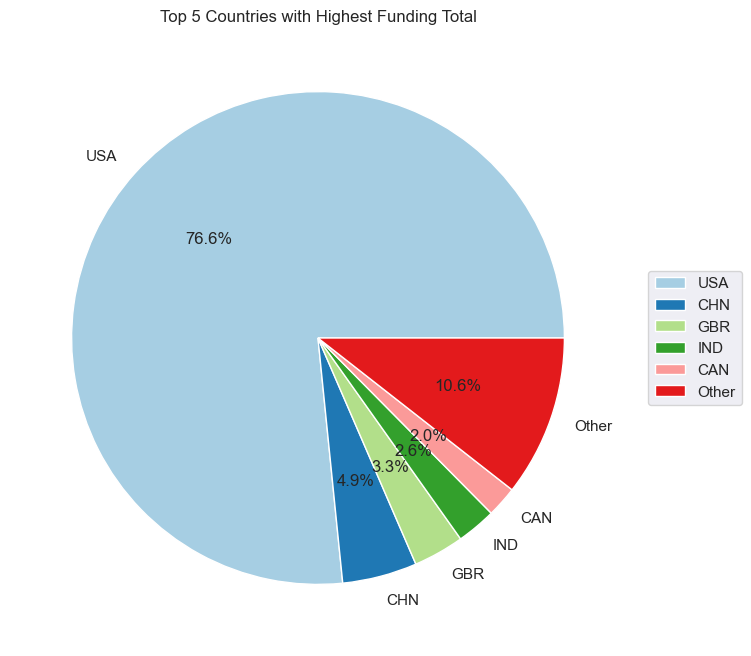

In [16]:
df_country_funding = df.groupby(['country_code', 'permalink'])['funding_total_usd'].sum().groupby('country_code').sum().sort_values(ascending=False)
top5= df_country_funding[:5]
other = df_country_funding[5:].sum()
labels = top5.index.tolist() + ['Other']
values = top5.tolist() + [other]
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(values, labels=labels, autopct = '%.1f%%', colors = sns.color_palette("Paired"))
plt.title('Top 5 Countries with Highest Funding Total')
ax.legend(bbox_to_anchor=(1.2, 0.5), loc='center right')
plt.show()

### Total Funding per Year
The histogram below depicts the relationship between the first year start-ups received their funding and the total amount of funding in the year. From the histogram, it becomes apparent that the popularity for start-ups has seen a slow start, but rapidly expands after 2005. After 2005, we notice an increased spike in funding for start-ups. This change can be explained due to the change of behavior of the venture capital firms fundraising scheme. At first, these VC firms primarily focused on funding promising and low-risk start-ups. However, due to the costs of start-ups decreasing after 2005, a different trend started to exist in the VC environment. Due to technological advancements (Open source software, SaaS developer tools or cloud hosting etc.), technology-based start-ups could launch working products and acquire customers with minimal required funding. Therefore, investors could be attracted with a realistic idea and the risk would be lowered significantly for investment (Friedman, 2019).Especially after the economic crisis in 2008, the funding for start-ups peaks around 2009-2010 with funding totals above $50 billion. In further analyses, we will examine which markets received the most popularity in this time period.

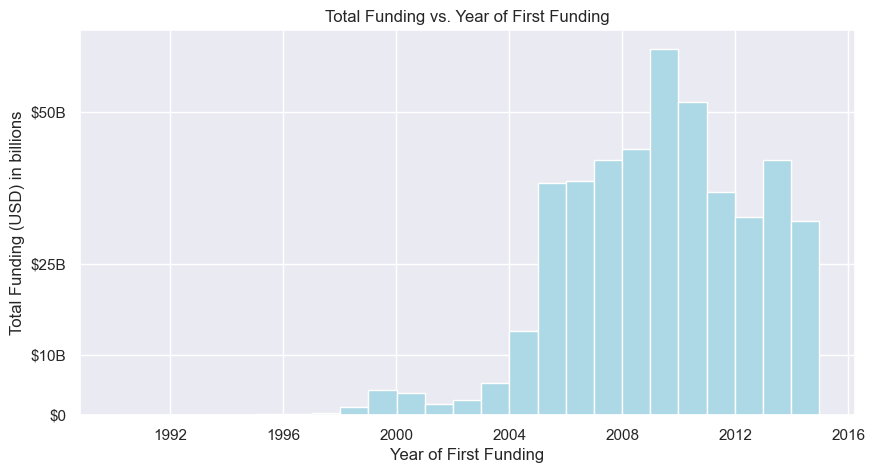

In [51]:
# Plot the funding total (USD) against the first_funding_at
plt.figure(figsize=(10, 5))
plt.hist(df['first_funding_at'], weights=df['funding_total_usd'], bins=25, color = "lightblue")
plt.xlabel('Year of First Funding')
plt.ylabel('Total Funding (USD) in billions')
plt.title('Total Funding vs. Year of First Funding')
plt.yticks([0, 10000000000, 25000000000, 50000000000], ['$0', '$10B', '$25B', '$50B'])
plt.show()

#### Most Funded Markets per Country (Top 5):

In the depicted five histograms, the histograms show the top 5 most funded markets of each country within the top 5 countries. 

- USA: As for the USA, the "Biotechnology" market is receiving the most funding, followed by the "Software", "Health Care", "Clean Technology", and "Enterprise Software" market. This is due to the increasing popularity of technology globally and the attractiveness to enter the market as a start-up. "Biotechnology", "Software", "Healthcare", "Clean Technology", and "Enterprise Software" are major areas of focus, with significant investment in research and development. The USA has a favorable ecosystem for technology innovation, with access to capital, a skilled workforce, and a culture of entrepreneurship. Leading technology companies like Apple, Microsoft, Google, Amazon, Facebook, Netflix, and Airbnb have originated from the USA, contributing to its global dominance in the technology industry.

- CHN: The E-Commerce sector in China is receiving the majority of funding due to the large and growing market, rising middle class, and increasing consumer spending. Following "E-Commerce", sectors such as "Technology", "Software", "Photography", and "Mobile" are also attracting funding due to their growth potential and relevance in China's economy. These sectors are seen as having strong opportunities in the Chinese market, which is driving investor interest and funding allocation.

- GBR: The markets for "Mobile", "Biotechnology", "Software", "Telecommunications", "Clean Technology" respectively are among the top 5 markets in Great Britain, receiving high total funding due to their growth potential, innovation opportunities, and economic impact. These sectors are driven by advancements in technology, favorable regulations, and government support, making them attractive to investors seeking investment opportunities in Great Britain.

- IND: The top 5 markets in India attracting the majority of funding are "Online Shopping", "Development Platforms", "E-Commerce", "Clean Technology", and "Software". These sectors are experiencing rapid growth in India due to factors such as increasing changing consumer preferences and favorable government policies. Investors are attracted to the potential of these markets in India, which offer opportunities for innovation, scalability, and economic growth. Furthermore, the workforce starts to specialize in lending IT services in this global economy.

- CAN: As for Canada, the most funded markets are considered to be quite similar compared to the USA, funding in "Clean Technology", "Software", "Biotechnology", "Mobile" and "Enterprise Software". Interesting is that these markets do not see significant differences and remain closely distributed without heavy outliers compared to the USA or China

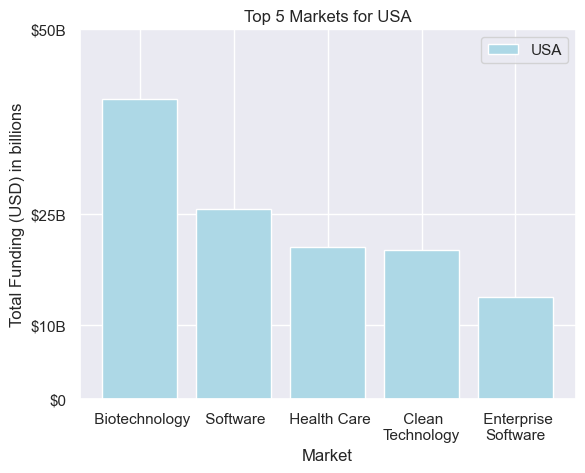

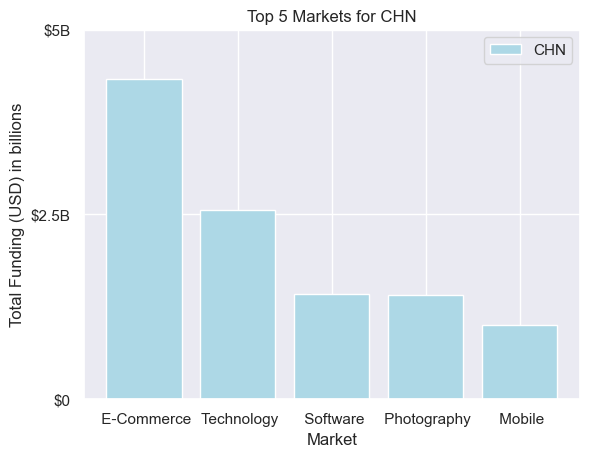

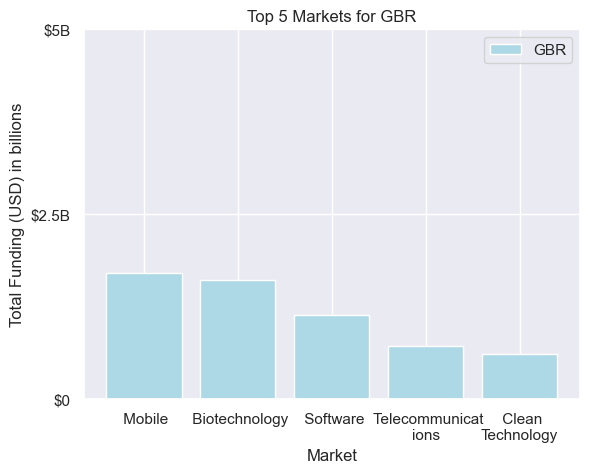

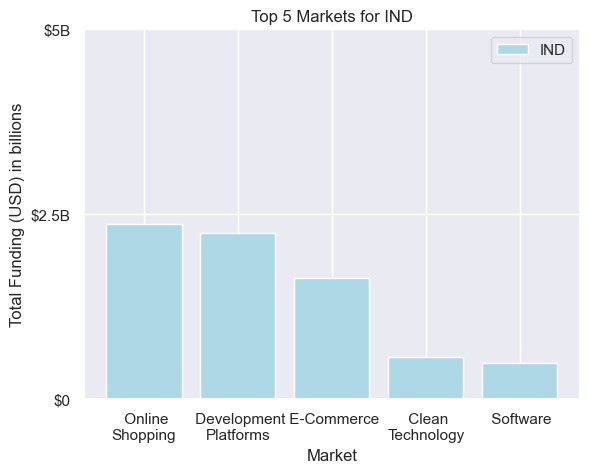

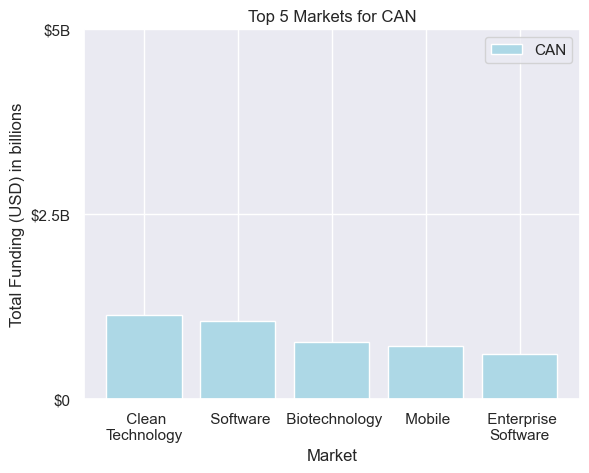

In [18]:
import textwrap
# Acquire the top 5 countries with the highest funding total
top_countries = df.groupby('country_code')['funding_total_usd'].sum().nlargest(5).index.tolist()
# Create a bar chart separately for each of the countries in the top 5
for i, country in enumerate(top_countries):
    # Top 5 markets per country, sort the markets by funding total
    top_markets = df[df['country_code'] == country].groupby('market')['funding_total_usd'].sum().nlargest(5)
    # Data frame for top 5 markets
    market_data = pd.DataFrame({'market': top_markets.index, 'funding_total_usd': top_markets.values})
    # Plot the bar chart and labels
    plt.bar(market_data['market'], market_data['funding_total_usd'], label=country, color = "lightblue")
    plt.title('Top 5 Markets for {}'.format(country))
    plt.xlabel('Market')
    plt.ylabel('Total Funding (USD) in billions')
    # If statement since the numbers for the USA are marginally larger, helps with clarity of graphs
    if i == 0:
        plt.yticks([0, 10000000000, 25000000000, 50000000000], ['$0', '$10B', '$25B', '$50B'])
    else:
        plt.yticks([0, 2500000000, 5000000000], ['$0', '$2.5B', '$5B'])
    xtick_labels = [ '\n'.join(textwrap.wrap(label, width=15)) for label in market_data['market'] ]
    plt.xticks(range(len(xtick_labels)), xtick_labels, rotation=0)
    plt.legend()
    # Print the bar chart
    plt.show()

#### Funding per Market (First Funding)
The graph shows the relationship between first funding date and total funding by market.
The first funding already started in 1990, slightly leading to more fundings of startups starting from 1995. 
The years 2007-2008 show a decline in the majority of the markets that have received funding. A solid explanation would be the impact of the financial crisis. 
After the 2008, the total funding amount started to peak and markets such as "Biotechnology", "Health Care", "Software" and "Enterprise Software" start to ramp up as interesting investment sectors. 

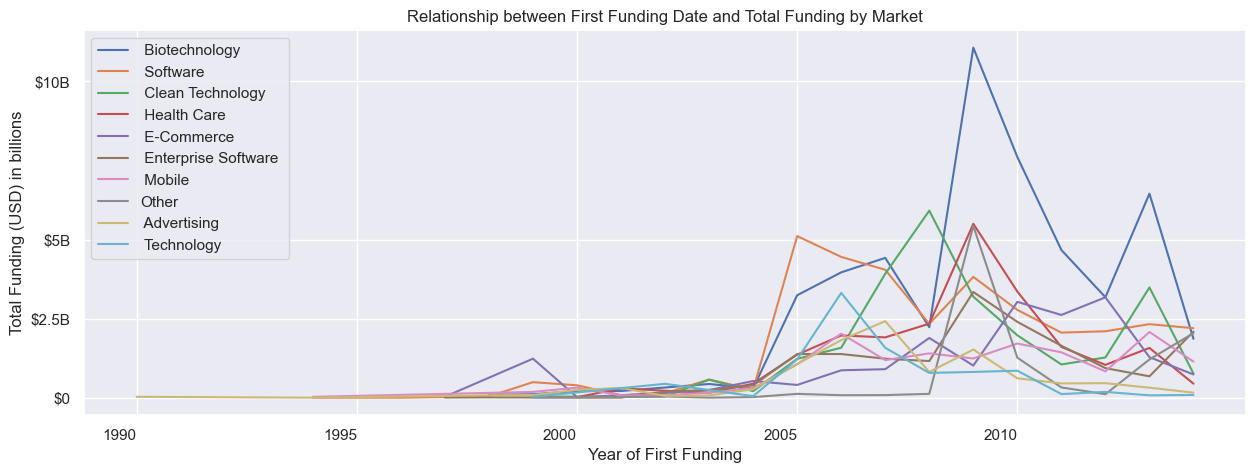

In [47]:
# Get the top 5 markets by funding total
top_markets = df.groupby('market')['funding_total_usd'].sum().nlargest(10).index.tolist()
# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(15, 5))
# Loop for each of the top 5 markets (funding_total_usd)
for market in top_markets:
    data = df[df['market'] == market]
    # Group the data by year and sum the funding totals
    funding_year = data.groupby(data['first_funding_at'].dt.year)['funding_total_usd'].sum()
    # Plot the line plot
    ax.plot(funding_year.index, funding_year.values, label=market)
# Chart Title & Labels
ax.set_xlabel('Year of First Funding')
ax.set_ylabel('Total Funding (USD) in billions')
ax.set_title('Relationship between First Funding Date and Total Funding by Market')
# Set the x-axis label for every 5 years
min_year = df['first_funding_at'].min().year
max_year = df['first_funding_at'].max().year
xticks = list(range(min_year, max_year + 1, 5))
plt.xticks(xticks, ha='right')
plt.yticks([0, 2500000000 ,5000000000, 10000000000], ['$0', '$2.5B' , '$5B', '$10B'])
# Plot the legend and line plot
plt.legend()
plt.show()

#### Top 5 Markets (Funding Total)
The bar chart showcases the top 5 markets that are receiving the majority of the funding, compared to the total funding amount USD in billions. The graph before showcased the relationship over the years, whereas this bar chart presents the funding in their total form for the top 5 markets.

The "Biotechnology" market receives the highest funding, followed by the markets for "Software", "Clean Technology", "Health Care", "E-Commerce".
According to the bar chart, the "Biotechnology" market is receiving the highest amount of funding, indicating that it is a highly attractive market for investors. This may be due to the potential for breakthrough innovations in biotechnology, which can have significant implications in areas such as healthcare, agriculture, and environmental sustainability. Interesting is the fact that the "Biotechnology" market receives considerably more funding and opportunities for start-ups compared to the rest.

The "Software" market comes second in terms of funding, indicating that it is also a highly popular market for investors. This could be due to the increasing demand for software solutions across various industries, as well as the potential for high scalability and profitability in the software industry.

The "Clean Technology", "Health Care", and "E-Commerce" markets also receive substantial funding, as shown in the histogram. This suggests that these markets are also considered attractive by investors, with opportunities for innovation, growth, and returns on investment.

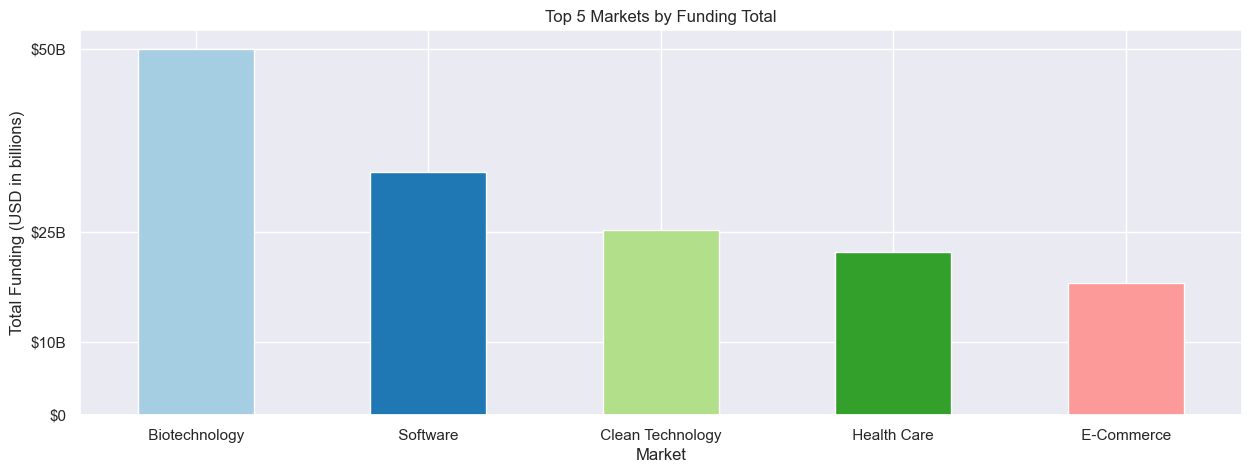

In [46]:
# Top 5 markets sorted by funding_total_usd
top_markets = df.groupby('market')['funding_total_usd'].sum().nlargest(5)
# Create the bar charts
bar = top_markets.plot(kind='bar', figsize=(15, 5), color=sns.color_palette("Paired"))
# Labels & Titles
bar.set_xlabel('Market')
bar.set_ylabel('Total Funding (USD in billions)')
bar.set_title('Top 5 Markets by Funding Total')
# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0,ha='center')
plt.yticks([0, 10000000000, 25000000000, 50000000000], ['$0', '$10B', '$25B', '$50B'])
# Show the chart
plt.show()

## Descriptive Statistics

#### Years before First Funding
The following section shows the descriptiove summary statistics between 'founded_at' and 'first_funding_at' in years. In other words, it describes how many years on average it took for a start-up to receive its first funding. The mean time difference is 2.99 years, with a corresponding standard deviation of 3.91 years. This means that there is quite a difference regarding the time it took to receive funding among the start-ups. The median time difference is 1.58 years.

In [21]:
# Difference in time
time_diff_years = (df['first_funding_at'] - df['founded_at']).dt.days / 365.25 #Year
# Compute summary statistics
mean = time_diff_years.mean()
std_dev = time_diff_years.std()
median = time_diff_years.median()
# Print the results
print(f"Mean time difference: {mean:.2f} years")
print(f"Standard deviation of time difference: {std_dev:.2f} years")
print(f"Median time difference: {median:.2f} years")

Mean time difference: 2.99 years
Standard deviation of time difference: 3.91 years
Median time difference: 1.58 years


#### Mean Difference for Top 10 Markets
The bar chart shows the mean time difference for top 10 markets compared to time between founding and funding in years. The top 10 markets are respectively "Biotechnology", "Clean Technology", "Health Care", "Software", "Enterprise Software", "Other", "Technology", "Mobile", "E-Commerce", and "Advertising".

One notable observation from the histogram is that the "Biotechnology" market has the longest time difference between the founding of the start-up and receiving their first funding from investors. This suggests that companies in the biotechnology industry may require a significant amount of time before securing funding, which could indicate higher investment risk. The lengthy duration between founding and funding may be due to the unique challenges and regulatory requirements associated with the biotechnology industry, such as lengthy research and development timelines, complex regulatory approvals, and high capital requirements for clinical trials and commercialization. Furthermore, building the facilities required for them to operate would also require significant time before production can even start.

On the other hand, the "E-Commerce" and "Advertising" market have the shortest time duration between founding and funding, as mentioned in the descriptive summary statistics. This implies that companies in the e-commerce and advertising industry may be able to secure funding relatively quickly compared to other markets, indicating potentially lower investment risk. This may be due to the relatively faster pace of business operations in the e-commerce industry, with shorter product development cycles, rapid market entry, lower requirements to start up and potential for quick revenue generation after operating.

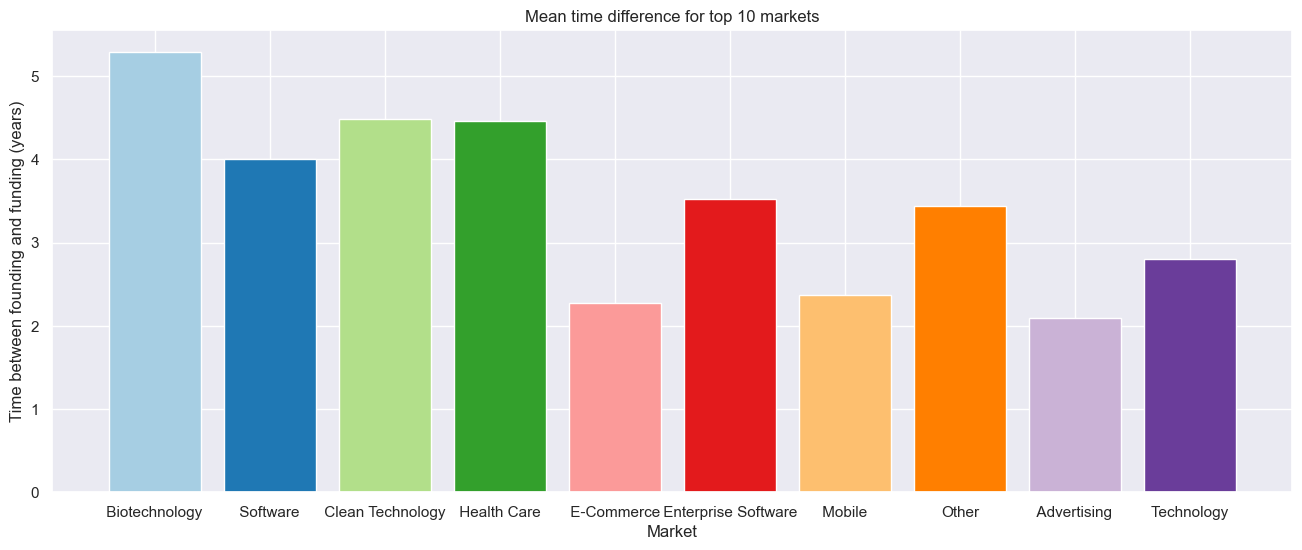

In [22]:
# Descriptive summary statistics for top 10 markets
# How many years it took for the first funding for the top 10 markets
# Difference in time
top10_time_diff = df.groupby('market')['funding_total_usd'].sum().nlargest(10).index.tolist()
mean_time_list = []
for i in top10_time_diff:
    market_df = df[df['market'] == i]
    time_diff = (market_df['first_funding_at'] - market_df['founded_at']).dt.days / 365
    mean_time_diff = time_diff.mean()
    mean_time_list.append(mean_time_diff)
    std_dev_diff = time_diff.std()
    median_diff = time_diff.median()
#     # Print the summary statistics for each market in top 10 'i'
#     print(f"{i}- Mean time difference: {mean_time_diff:.2f} years")
#     print(f"{i}- Standard deviation of time difference: {std_dev_diff:.2f} years")
#     print(f"{i}- Median time difference: {median_diff:.2f} years")
    
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(top10_time_diff, mean_time_list, color=sns.color_palette("Paired"))
ax.set_xlabel('Market')
ax.set_ylabel('Time between founding and funding (years)')
ax.set_title('Mean time difference for top 10 markets')
plt.show()

#### Mean Founding Rounds per Status
The bar chart shows the mean of the founding rounds per funding status. This implicates the amount of funding rounds required to achieve certain statuses on average.

"Acquired" fundings have had the highest average of funding rounds. This is followed by fundings with the status of respectively "Operating", "Unknown", and "Closed".

The funding status category "Acquired" has the highest average number of funding rounds. This could implicate that on average, companies that have been acquired have gone through more funding rounds compared to other funding status categories. As they have received more fundings over time, the chances for them to survive and be acquired by larger corporations increases.

The funding status category "Operating" comes next in terms of the average number of funding rounds. This indicates that, on average, companies that are still in operation and actively conducting business have gone through a significant number of funding rounds, although slightly lower than the "Acquired" category.

The funding status category "Unknown" has a lower average number of funding rounds compared to "Acquired" and "Operating". This could mean that companies with an unknown funding status have received fewer funding rounds on average, which could be due to lack of available data or information on their funding activities.

The funding status category "Closed" has the lowest average number of funding rounds. This suggests that, on average, companies that have closed down or ceased operations have gone through fewer funding rounds compared to other funding status categories, possibly due to challenges in securing funding or sustaining their business.

The data here could implicate that start-ups with higher amounts of funding rounds were more likely to survive in their respective industries and succeed as part of being acquired by larger corporations.

           funding_rounds
status                   
Unknown          1.847826
acquired         2.281852
closed           1.572614
operating        1.994297


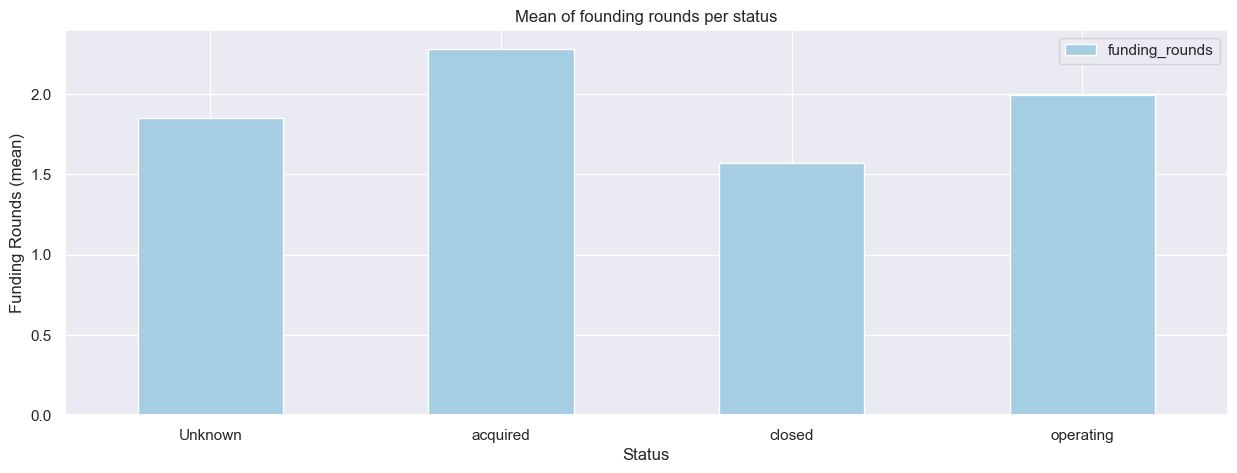

In [45]:
#Calculate the average amount of rounds per status type
rounds_status = df.pivot_table(values='funding_rounds', index='status', aggfunc='mean')
print(rounds_status)
#The results might indicate that start-ups with higher amounts of funding rounds are more likely to succeed.
# Create the bar charts
bar = rounds_status.plot(kind='bar', figsize=(15, 5), color=sns.color_palette("Paired"))
# Labels & Titles
bar.set_xlabel('Status')
bar.set_ylabel('Funding Rounds (mean)')
bar.set_title('Mean of founding rounds per status')
# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)
# Show the chart
plt.show()

## USA specific analysis
As the USA covers more than three quarters of the highest total funding, we are also taking a closer look at the USA specific data to see if there are any interesting insights regarding the start-up market and funding development.

In [24]:
# Creating a usa only dataframe
df_usa = df[df["country_code"] == "USA"]
df_usa.head(5)

permalink                name  \
0           /organization/waywire            #waywire   
3  /organization/r-ranch-and-mine  -r- ranch and mine   
4      /organization/club-domains       .club domains   
7       /organization/10-20-media         10-20 media   
8        /organization/1000-corks          1000 corks   

                homepage_url                               category_list  \
0     http://www.waywire.com  |Entertainment|Politics|Social Media|News|   
3              Not available               |Tourism|Entertainment|Games|   
4           http://nic.club/                                  |Software|   
7  http://www.10-20media.com                                |E-Commerce|   
8       http://1000corks.com                                    |Search|   

         market  funding_total_usd     status country_code state_code  \
0         News           1750000.0   acquired          USA         NY   
3      Tourism             60000.0  operating          USA         TX   
4     Software           7000000.0    Unknown          USA         FL   
7   E-Commerce           2050000.0  operating          USA         MD   
8       Search             40000.0  operating          USA         OR   

             region          city  funding_rounds founded_at first_funding_at  \
0     New York City      New York               1 2012-06-01       2012-06-30   
3            Dallas    Fort Worth               2 2014-01-01       2014-08-17   
4    Ft. Lauderdale  Oakland Park               1 2011-10-10       2013-05-31   
7         Baltimore      Woodbine               4 2001-01-01       2009-06-18   
8  Portland, Oregon   Lake Oswego               1 2008-01-01       2011-08-23   

  last_funding_at  
0      2012-06-30  
3      2014-09-26  
4      2013-05-31  
7      2011-12-28  
8      2011-08-23

#### States Ranked by Total Received Funding
The first figure plots and ranks the top 10 most funded states. As depicted by the graph, the most funded state is California, which accounts for almost half (46%) of the total funding in the USA. Followed by New York, Massachusetts, Texas and Washington, with respectively 8.9%, 8.8%, 5.2% and 4.2%. There are several reasons why California receives the majority of startup funding in the USA. First, California is home to Silicon Valley, which is widely regarded as the global epicenter of technology innovation and entrepreneurship. This ecosystem attracts investors, entrepreneurs, and talent from around the world, making it an ideal location for startups seeking funding and growth.

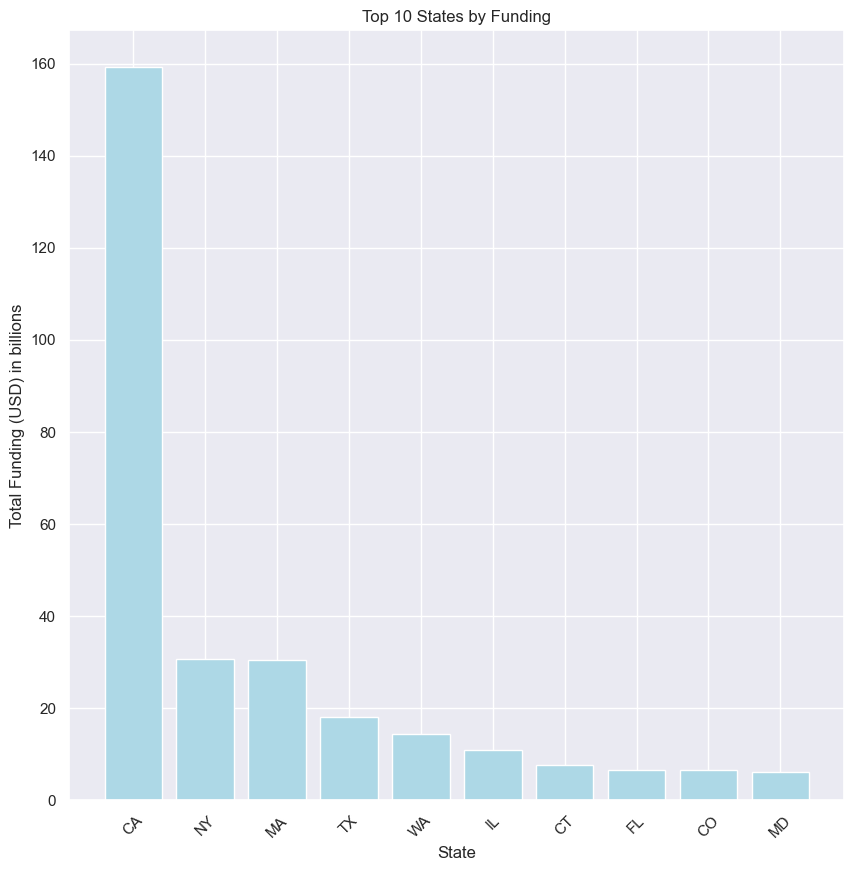

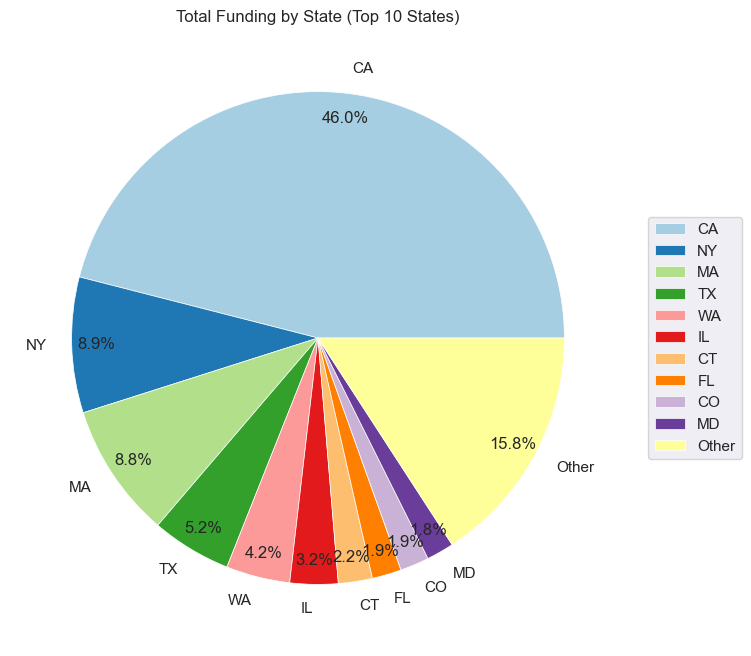

In [25]:
# Bar chart, defining the variables etc. Funding per state
state_funding = df_usa.groupby("state_code")["funding_total_usd"].sum()
top10states = state_funding.sort_values(ascending=False)[:10]
top10states_bar = round(state_funding.sort_values(ascending=False)[:10]/1000000000,2)

# Bar Chart plt
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(top10states_bar.index, top10states_bar.values, color="lightblue")
plt.title("Top 10 States by Funding")
plt.xlabel("State")
plt.xticks(rotation = 45)
plt.ylabel("Total Funding (USD) in billions")
plt.show()

# Pie chart, making "Others" category for all the states not included in the top 10
top10states_pie = state_funding.sort_values(ascending=False)[:10]
top10_totalfunding_pie = top10states_pie.sum()
other_funding_pie = state_funding.sum() - top10_totalfunding_pie
state_names = list(top10states_pie.index) + ["Other"]
funding_amounts = list(top10states_pie.values) + [other_funding_pie]

# Pie chart plt
fig, ax = plt.subplots(figsize=(8, 8))
wedgeprops = {"linewidth": 0.5, "edgecolor": "white"}
plt.pie(funding_amounts, labels=state_names, autopct="%1.1f%%", pctdistance=0.90, wedgeprops=wedgeprops, colors = sns.color_palette("Paired"))
plt.title("Total Funding by State (Top 10 States)")
ax.legend(bbox_to_anchor=(1.2, 0.5), loc="center right")

plt.show()

#### Top 10 Most Funded Markets in the USA
The graphs shows the top 10 most funded markets in the USA. It is noteworthy that the majority of the markets depicted in the graph are located in the technology sector or the information technology sector. The most funded market as depicted in the graph is the biotechnology market.

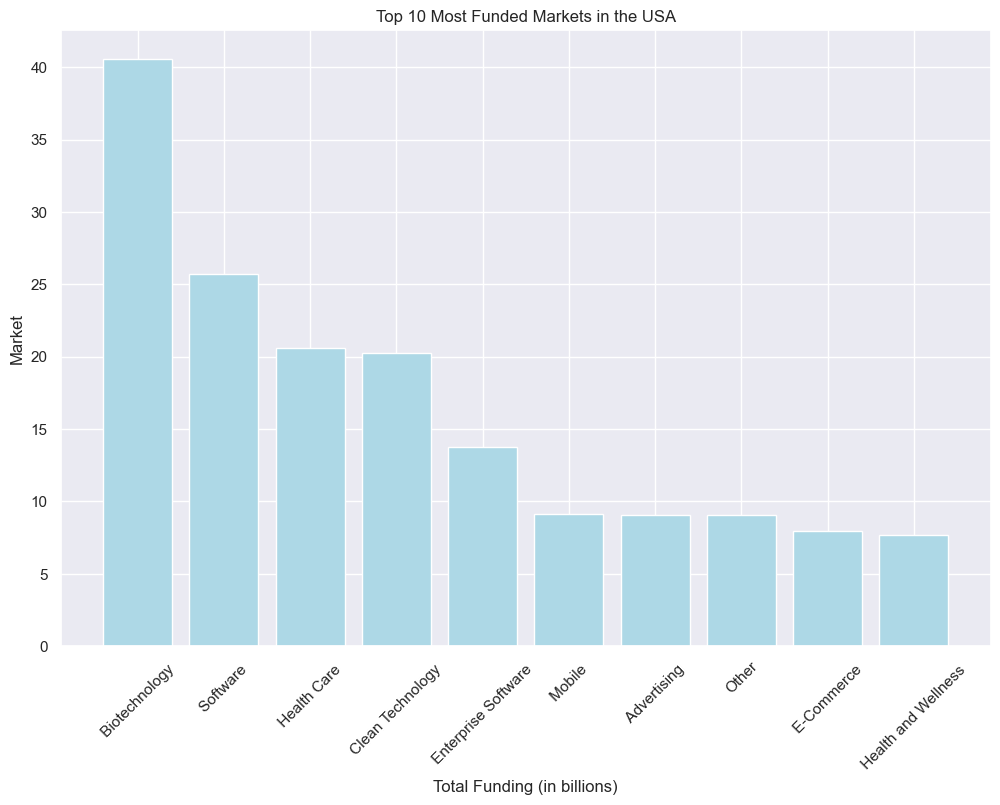

In [26]:
# Most popular Markets per state, using pandas Series and lambda
most_popular_market = df.groupby("state_code")["market"].apply(lambda x: x.value_counts().index[0])
df_most_popular_market = pd.DataFrame({"state_code": most_popular_market.index, "most_popular_market": most_popular_market.values})
df_most_popular_market

# Get the top 10 most funded markets
top_10_markets = df_usa.groupby("market")["funding_total_usd"].sum().sort_values(ascending=False)[:10]

# Bar chart for top 10 most funded market in the US, almost the same as the descriptive analysis, but now top 10 instead of top 5
plt.figure(figsize=(12, 8))
plt.bar(top_10_markets.index, top_10_markets.values/1000000000, color="lightblue")
plt.title("Top 10 Most Funded Markets in the USA")
plt.xlabel("Total Funding (in billions)")
plt.ylabel("Market")
plt.xticks(rotation = 45)
plt.show()

#### Most Funded Market of Top Funded States
The following chart presents the most funded market of each of the top funded state. Interestingly, the most funded market of the top 3 most funded states is the biotechnology market.

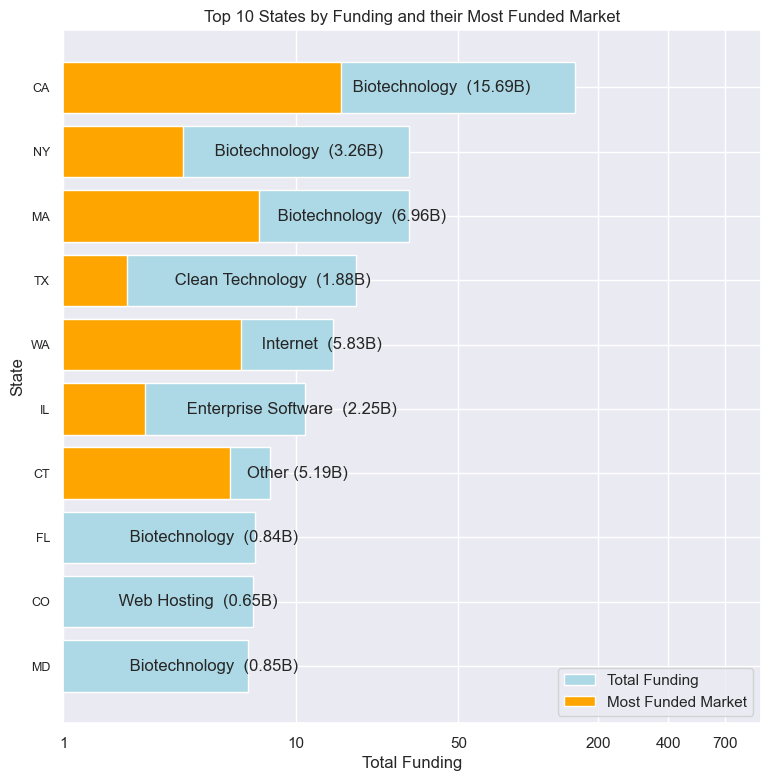

In [27]:
# Defining variables to use for the stacked barchart --> Sbar = Stacked Bar 
state_funding_Sbar = df_usa.groupby("state_code")["funding_total_usd"].sum()
top10stateslist = state_funding_Sbar.sort_values(ascending=False)[:10].index.tolist()
top10states_Sbar = state_funding.sort_values(ascending=False)[:10]/1000000000

# Adds the top funded market per state into the empty list by looping through the top 10 most funded states
top_markets = []
for state in top10stateslist:
    markets = df_usa[df_usa["state_code"] == state].groupby("market")["funding_total_usd"].sum().sort_values(ascending=False)[:1]
    top_market = markets.index.tolist()[0]
    top_markets.append(top_market)

# Creating the bar chart
plt.figure(figsize=(9, 9))
plt.barh(top10stateslist, top10states_Sbar, color="lightblue")
plt.title("Top 10 States by Funding and their Most Funded Market")
plt.xlabel("Total Funding")
plt.ylabel("State")

for i, (state, funding) in enumerate(zip(top10stateslist, top10states_Sbar)):
    market_funding = df_usa[(df_usa["state_code"] == state) & (df_usa["market"] == top_markets[i])]["funding_total_usd"].sum()/1000000000
    plt.barh(state, market_funding, color="orange")
    plt.text(market_funding + 1, i, "{} ({:.2f}B)".format(top_markets[i], market_funding), va="center")

# Creating the axis, had to use log because the CA had the highest funding
plt.xscale("log")
plt.xticks([1, 10, 50, 200, 400, 700], [1, 10, 50, 200, 400, 700])
plt.xlim(1, 1000)
plt.yticks(fontsize=9)
plt.gca().invert_yaxis()
plt.legend(["Total Funding", "Most Funded Market"], loc="lower right")
plt.show()

## Additional Data
To enhance our analysis, we have decided to include two sets of secondary data about countries‘ GDP and inflation rate as we want to explore the relationship of the economic conditions of the top 5 countries and the received funding/number of companies receiving funding originating from the top 5 companies. Furthermore, we are also looking at the employment rate and education level for these countries as an extra indicator of economic conditions.

### Inflation rate
The inflation rate can be an important factor to consider when predicting startup funding because it affects the purchasing power of money over time. When the inflation rate is high, the value of money decreases, making it more expensive to purchase goods and services. This can lead to higher costs for startups, including the cost of raw materials, equipment, and labor. We will take a deeper look at the global inflation data over the period 1990 and 2015 (Hossain, 2023)

In [28]:
# Import datasets inflation
df_inflation = pd.read_csv('../data/Global Dataset of Inflation.csv', encoding = 'latin-1') # plug in reference for data source in google doc
df_inflation.columns = df_inflation.columns.str.lower()
df_inflation = df_inflation.rename(columns={'country code': 'country_code'})
df_inflation.head(5)

country_code  imf country code               country indicator type  \
0          ABW             314.0                 Aruba      Inflation   
1          AFG             512.0           Afghanistan      Inflation   
2          AGO             614.0                Angola      Inflation   
3          ALB             914.0               Albania      Inflation   
4          ARE             466.0  United Arab Emirates      Inflation   

                         series name   1970   1971   1972   1973   1974  ...  \
0  Headline Consumer Price Inflation    NaN    NaN    NaN    NaN    NaN  ...   
1  Headline Consumer Price Inflation  25.51  25.51 -12.52 -10.68  10.23  ...   
2  Headline Consumer Price Inflation   7.97   5.78  15.80  15.67  27.42  ...   
3  Headline Consumer Price Inflation    NaN    NaN    NaN    NaN    NaN  ...   
4  Headline Consumer Price Inflation  21.98  21.98  21.98  21.98  21.98  ...   

    2019   2020   2021   2022                      note  unnamed: 59  \
0   4.26   1.22   0.74   6.04  Annual average inflation          NaN   
1   2.30   5.44   5.06    NaN  Annual average inflation          NaN   
2  17.08  21.02  23.85  21.35  Annual average inflation          NaN   
3   1.41   1.62   2.04   6.73  Annual average inflation          NaN   
4  -1.93  -2.08   0.18   5.22  Annual average inflation          NaN   

   unnamed: 60  unnamed: 61  unnamed: 62  unnamed: 63  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 64 columns]

In [29]:
# Merge by country code
merged_df = pd.merge(df, df_inflation, on='country_code')
merged_df = merged_df[merged_df["note"] == "Annual average inflation"]

# Define a function that checks if a string represents a year in the format "YYYY"
def is_year(string):
    try:
        year = int(string)
        return 1990 <= year <= 2014
    except ValueError:
        return False

# Filter the columns that match the desired pattern
year_cols = [col for col in merged_df.columns if (is_year(col) or col in ["country_code","country"])]

# Create a new dataframe with only the desired columns and unique country_code
merged_df_inflation = merged_df[year_cols].drop_duplicates(subset='country_code')

merged_df_inflation

country_code         country    1990    1991     1992    1993    1994  \
0               USA   United States    5.40    4.23     3.03    2.95    2.61   
97160           EST         Estonia     NaN  202.00  1075.90   89.57   47.68   
97340           GBR  United Kingdom    8.04    7.44     4.56    2.58    2.20   
105355          CHL           Chile   26.04   21.78    15.43   12.73   11.44   
106245          FRA          France    3.19    3.21     2.36    2.10    1.66   
...             ...             ...     ...     ...      ...     ...     ...   
142983          JAM         Jamaica   21.94   51.46    77.26   21.92   35.24   
142987          KHM        Cambodia  141.80  191.00    75.00  114.32   10.44   
142993          MUS       Mauritius   13.40    7.09     4.68   10.61    7.30   
142999          MKD  Macedonia, FYR  600.00  110.80  1511.70  338.68  125.49   
143004          SYC      Seychelles    3.95    2.03     2.02   -0.34    2.23   

         1995   1996   1997  ...   2005  2006  2007   2008   2009   2010  \
0        2.81   2.93   2.34  ...   3.39  3.23  2.85   3.84  -0.36   1.64   
97160   28.74  23.02  10.58  ...   4.08  4.44  6.60  10.36  -0.08   2.97   
97340    2.62   2.85   2.19  ...   2.06  2.52  2.33   3.48   1.97   2.50   
105355   8.23   7.36   6.13  ...   3.05  3.39  4.41   8.72   0.35   1.41   
106245   1.80   1.98   1.20  ...   1.75  1.68  1.49   2.81   0.09   1.53   
...       ...    ...    ...  ...    ...   ...   ...    ...    ...    ...   
142983  19.94  26.43   9.70  ...  15.10  8.52  9.29  22.01   9.58  12.59   
142987  10.08   7.15  10.50  ...   6.35  6.14  7.67  25.00  -0.66   4.00   
142993   5.96   6.62   6.79  ...   4.94  8.93  8.86   9.67   2.56   2.97   
142999  16.06   2.42   1.37  ...   0.53  3.20  2.26   8.32  -0.74   1.50   
143004   0.50  -2.06   1.80  ...   0.65 -1.86  5.32  36.97  31.75  -2.40   

        2011  2012  2013  2014  
0       3.16  2.07  1.46  1.62  
97160   4.98  3.93  2.78 -0.11  
97340   3.88  2.56  2.29  1.43  
105355  3.34  3.01  1.93  4.39  
106245  2.11  1.95  0.86  0.51  
...      ...   ...   ...   ...  
142983  7.53  6.88  9.35  8.30  
142987  5.26  3.15  2.94  3.86  
142993  6.53  3.83  3.54  3.19  
142999  3.89  3.31  2.79 -0.27  
143004  2.56  7.11  4.34  1.39  

[98 rows x 27 columns]

In [30]:
country_funding_per_year = pd.DataFrame(df.groupby(['first_funding_at', 'country_code']).agg({'funding_total_usd': 'sum'}))

country_comp_per_year = pd.DataFrame(df.groupby(['first_funding_at', 'country_code']).agg({'permalink': 'count'}))
country_comp_per_year = country_comp_per_year.reset_index()
country_comp_per_year['first_funding_at'] = country_comp_per_year['first_funding_at'].dt.year
country_comp_per_year

first_funding_at country_code  permalink
0                  1990          USA          1
1                  1990          USA          1
2                  1993          USA          1
3                  1994          CHN          1
4                  1994          ISR          1
...                 ...          ...        ...
10125              2014          CHN          1
10126              2014          DEU          2
10127              2014          PRT          1
10128              2014          USA          2
10129              2014          USA          1

[10130 rows x 3 columns]

In [31]:
# Group by first_funding_at and country_code, and sum funding_total_usd
country_funding_per_year = df.groupby(['first_funding_at', 'country_code']).agg({'funding_total_usd': 'sum'})
# Reset the index to convert the groupby results to a DataFrame
country_funding_per_year = country_funding_per_year.reset_index()

# Convert funding_total_usd column from scientific notation to a normal number format
country_funding_per_year['funding_total_usd'] = country_funding_per_year['funding_total_usd'].apply(lambda x: '{:.0f}'.format(x))
country_funding_per_year['funding_total_usd'] = country_funding_per_year['funding_total_usd'].astype(float)

# Only take year from first_funding
country_funding_per_year['first_funding_at'] = country_funding_per_year['first_funding_at'].dt.year

country_funding_per_year

first_funding_at country_code  funding_total_usd
0                  1990          USA          1000000.0
1                  1990          USA         28150000.0
2                  1993          USA           125000.0
3                  1994          CHN         26660000.0
4                  1994          ISR           400000.0
...                 ...          ...                ...
10125              2014          CHN         10000000.0
10126              2014          DEU         31081347.0
10127              2014          PRT          4900000.0
10128              2014          USA          1900000.0
10129              2014          USA           750000.0

[10130 rows x 3 columns]

#### Company Counts and Inflation Rates
Our proposed first secondary data in addition to the provided document is a document containing global inflation rates. More specifically, the plots are showing the comparision between the number of companies of the top 5 countries receiving the most funding from 1990-2014 and the development of the inflation rate over the same period. We assume that a lower inflation rate could be positively related to the number of companies receiving funding in a certain year. Therefore, to provide a clear comparison, we have provided number of companies and inflation rate of the country the companies is located as subplots.

Looking at the example of USA, we can see a strong increase of companies receicing funding from 2008 to 2009. Likewise we can observe that the inflation rate from 2008 have sharply decreased in 2009, similar with GNB (United Kingdom) Though on in the example of CHN (China), we observe the opposite.

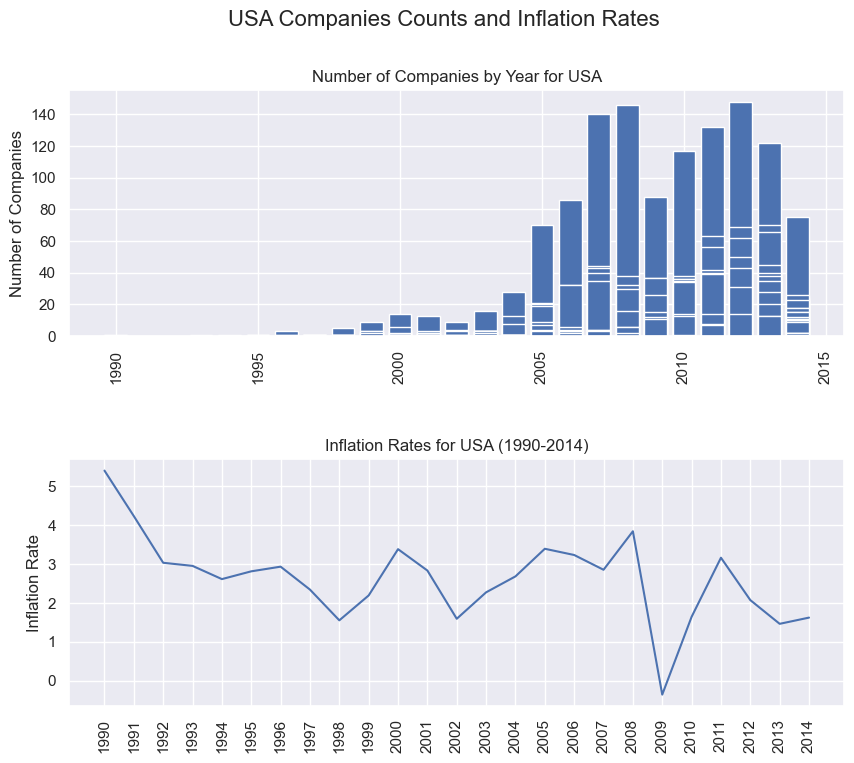

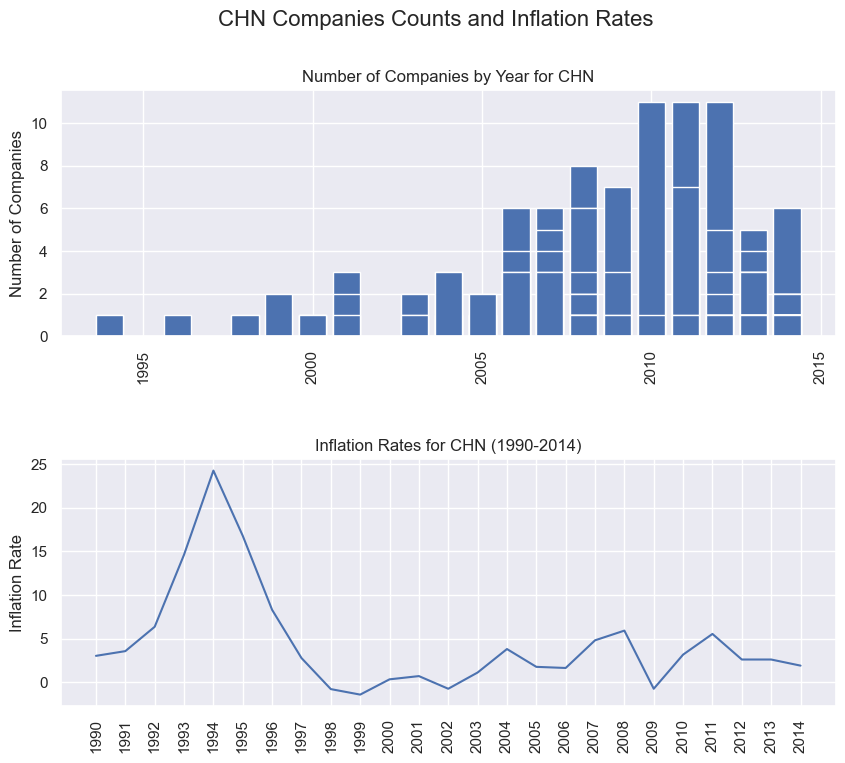

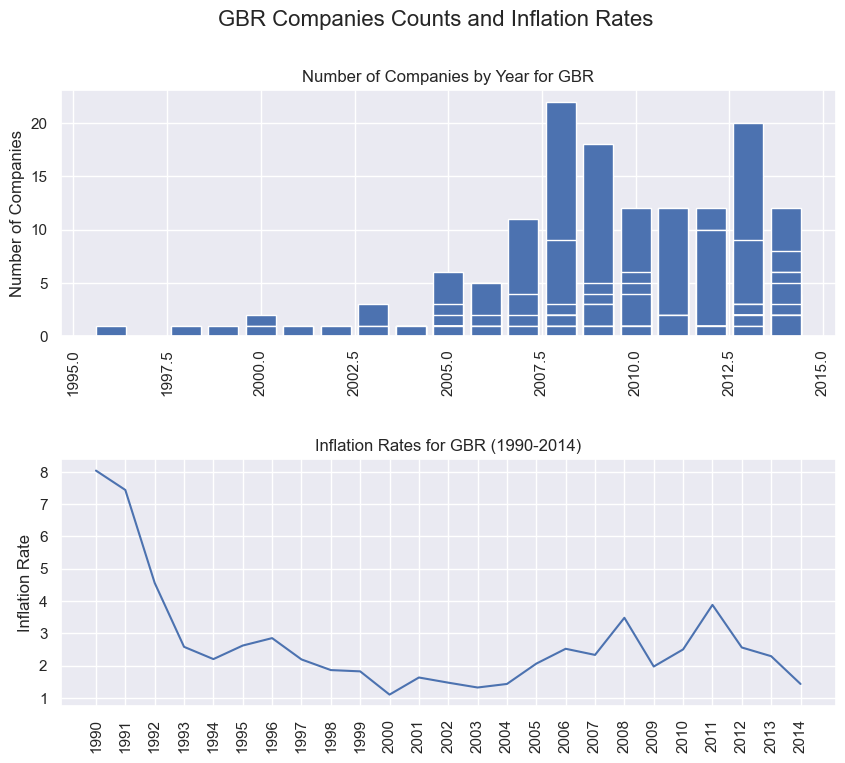

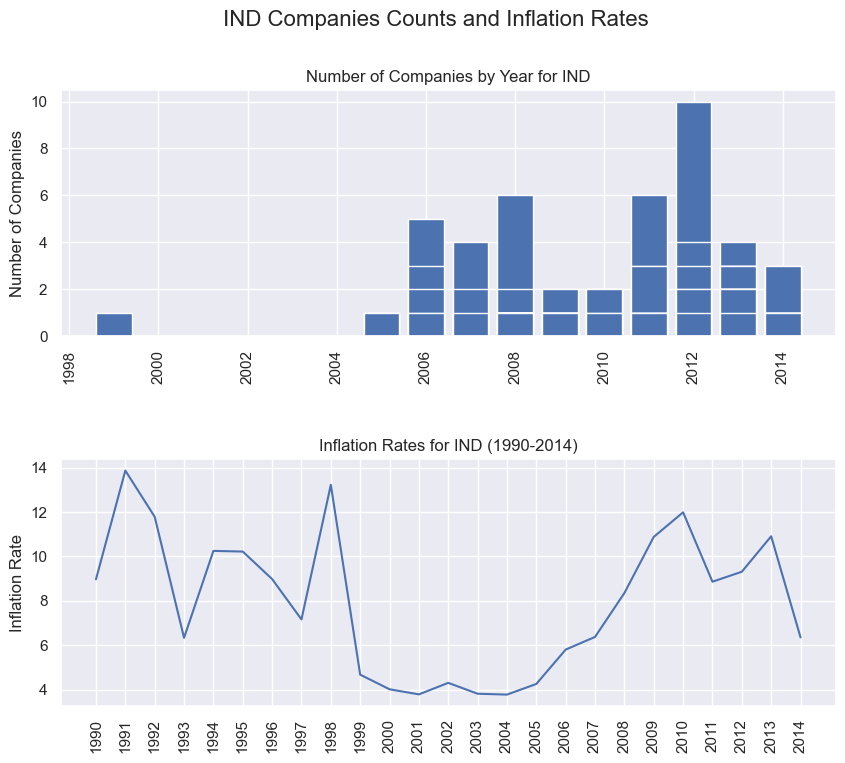

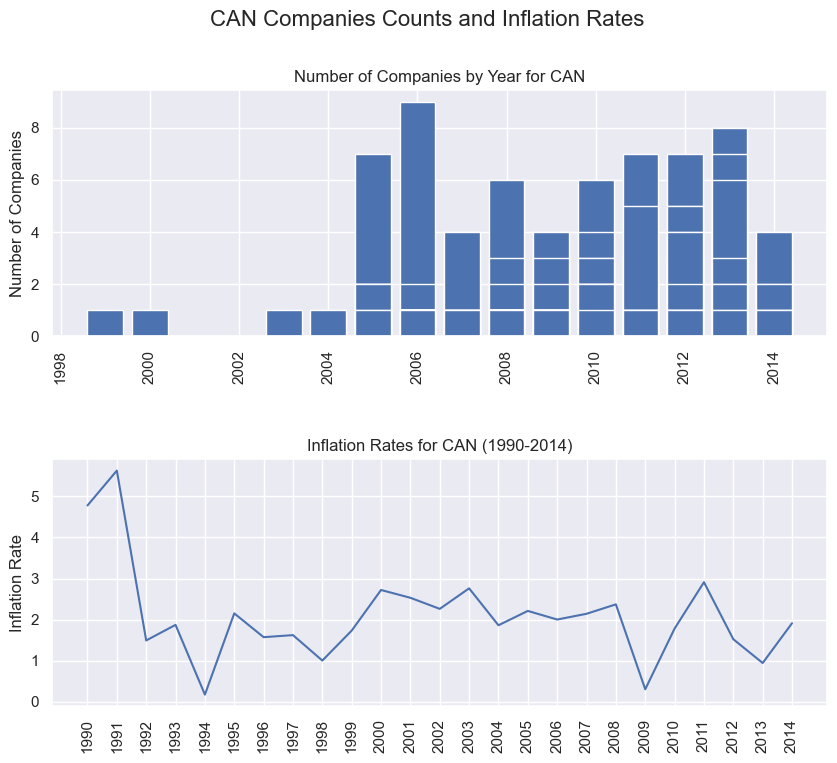

In [32]:
# List of country codes to plot
countries = ["USA", "CHN", "GBR", "IND", "CAN"]

# Loop through the country codes and plot the data for each country
for country in countries:
    # Filter the rows for the current country code
    country_comp = country_comp_per_year[country_comp_per_year['country_code'] == country]
    country_inflation = merged_df_inflation[merged_df_inflation['country_code'] == country]

    # Extract the years and project counts as lists
    comp_years = country_comp['first_funding_at'].tolist()
    comp_counts = country_comp['permalink'].tolist()

    # Get the inflation rates as a list
    inflation_years = list(country_inflation.columns[2:])
    inflation_rates = country_inflation.values.tolist()[0][2:]

    # Create a new figure with subplots for the project counts and inflation rates
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.subplots_adjust(hspace=0.5)

    # Plot the project counts by year
    ax1.bar(comp_years, comp_counts)
    ax1.set_title(f'Number of Companies by Year for {country}')

    # Rotate the x-axis labels for better visibility
    ax1.tick_params(axis='x', rotation=90)

    # Set the y-axis label
    ax1.set_ylabel('Number of Companies')

    # Plot the inflation rates over the years
    ax2.plot(inflation_years, inflation_rates)
    ax2.set_title(f'Inflation Rates for {country} (1990-2014)')

    # Rotate the x-axis labels for better visibility
    ax2.tick_params(axis='x', rotation=90)

    # Set the y-axis label
    ax2.set_ylabel('Inflation Rate')

    # Set the overall title of the figure
    fig.suptitle(f'{country} Companies Counts and Inflation Rates', fontsize=16)

    # Display the figure
    plt.show()

#### Funding Amount and Inflation Rates
As funding_total_usd is our target variable, we complement our analyses above with the comparsion of amount of funding received in each year for each of the top 5 countries with the inflation rate. 

USA: The lowest point of the inflation rate was in 2009, in the same year we can observe the maximum amount of funding received by American based companies.

CHN: The same minimum can be observed in China as well, though compared to the other years, 2009 was one of the years receiving the lower funding.

GBR: For the UK we observe the highest point in funding around 2014, from 2011 on we can see a sinking trend in the inflation rate. Though the inflation rate decreased from 2008 to 2009, we can also observe a decrease in funding in the same period.

IND: Likewise for India the highest amount of funding was received in 2014 with sharp increase from 2013 to 2014. India also experienced a sharp decline in inflation rate from 2013 to 2014. Whereas in the year of 2009, we see a steep increase in inflation rate from 2007-2009, though the funding amount in 2009 is the second highest during our analysed period.

CAN: There was a sharp decrease in the inflation rate from 2011 to 2013, which resulted in a strong increase of funding in the same period. Though in the year of 2009, acting as one of the lowest points of the inflation rate, we can only observe a moderate increase in funding compared to 2008.

In conclusion, we cannot observe consistent similarities in development in our comparison of the economic situation and the target variable. In the next part we will conduct more analyses on GDP. 

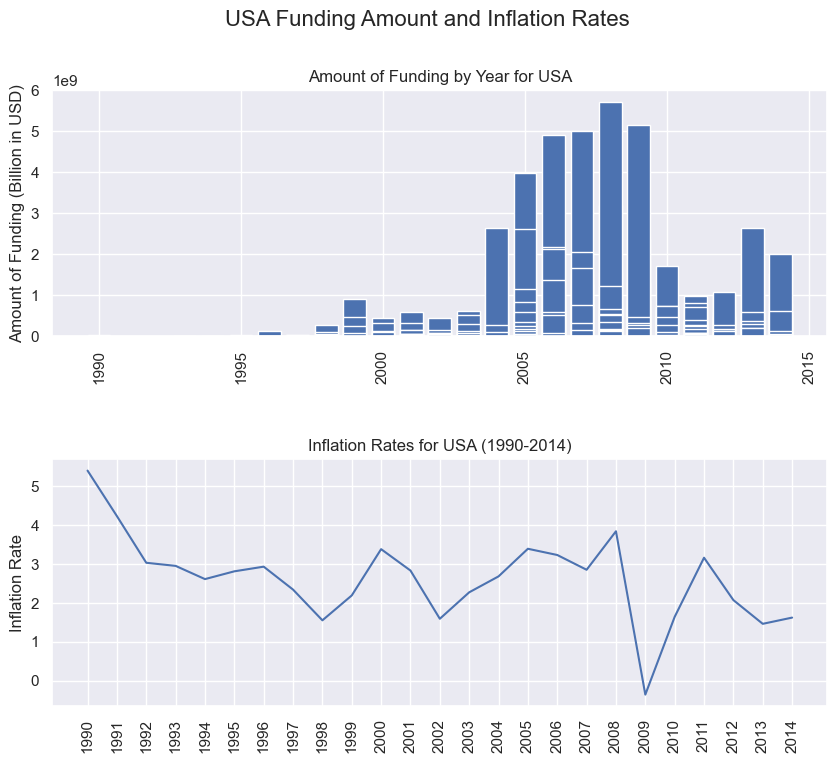

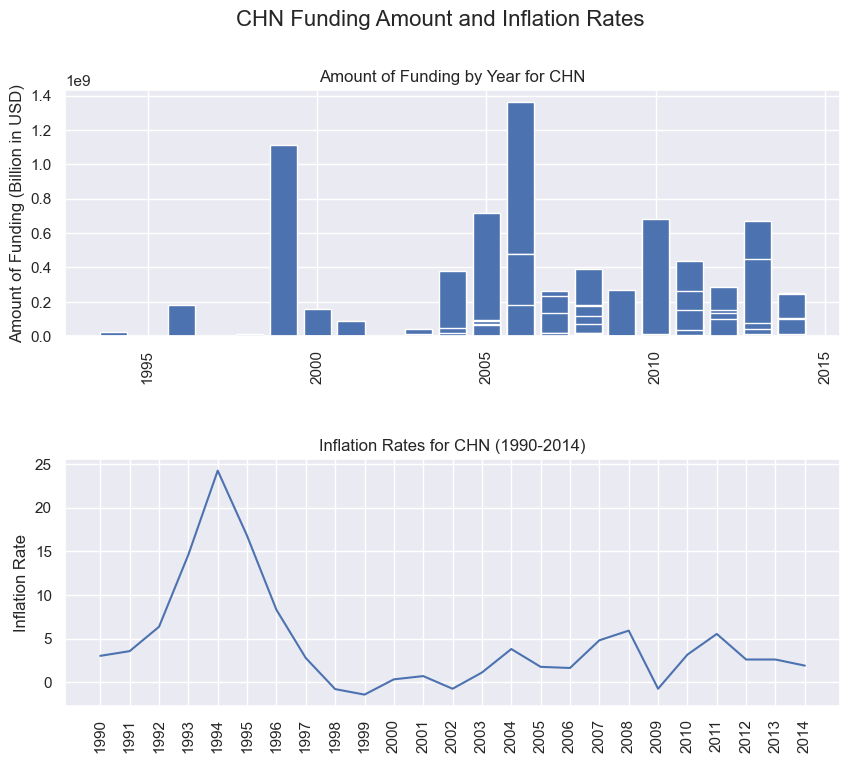

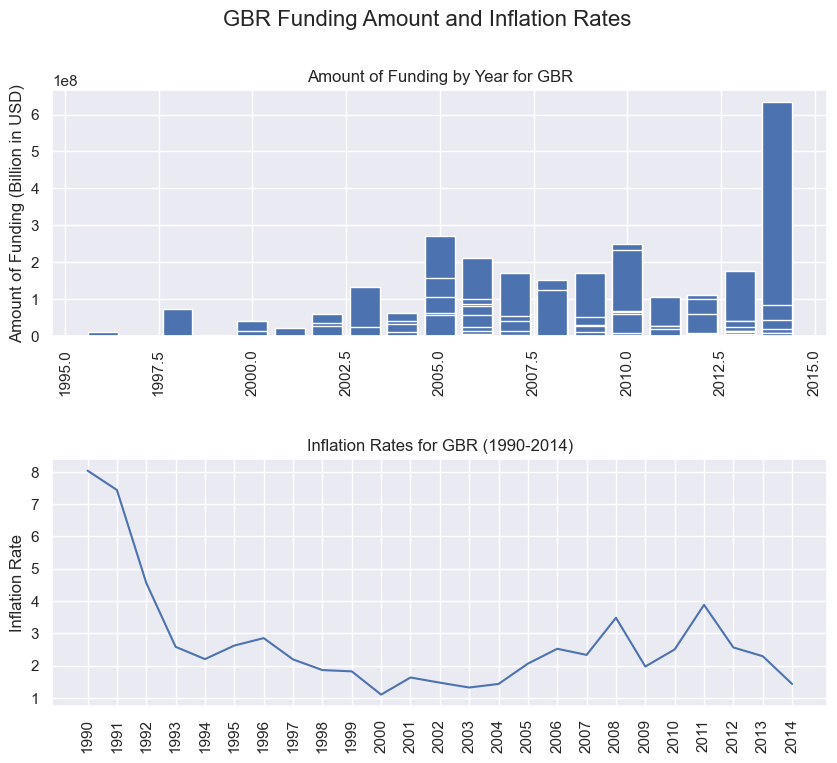

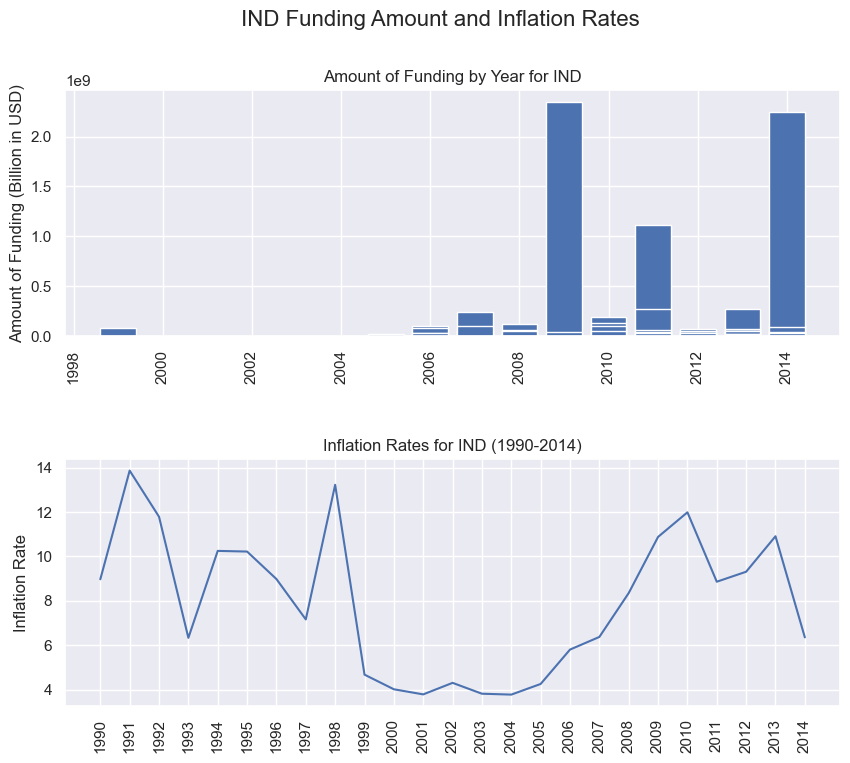

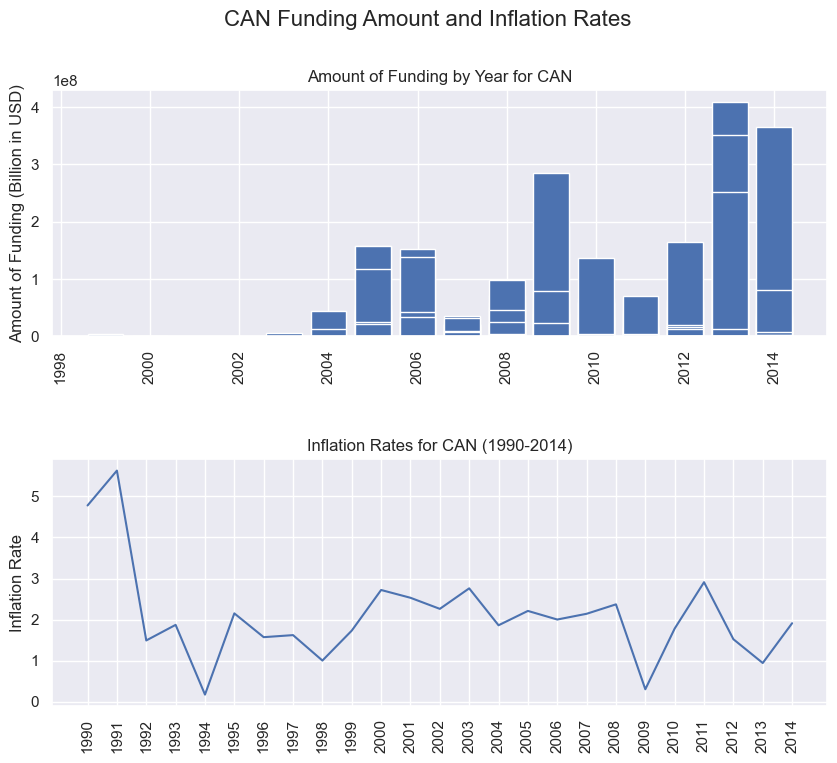

In [33]:
# List of country codes to plot
countries = ["USA", "CHN", "GBR", "IND", "CAN"]

# Loop through the country codes and plot the data for each country
for country in countries:
    # Filter the rows for the current country code
    country_funding = country_funding_per_year[country_funding_per_year['country_code'] == country]
    country_inflation = merged_df_inflation[merged_df_inflation['country_code'] == country]

    # Extract the years and project counts as lists
    funding_years = country_funding['first_funding_at'].tolist()
    funding_counts = country_funding['funding_total_usd'].tolist()

    # Get the inflation rates as a list
    inflation_years = list(country_inflation.columns[2:])
    inflation_rates = country_inflation.values.tolist()[0][2:]

    # Create a new figure with subplots for the project counts and inflation rates
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.subplots_adjust(hspace=0.5)

    # Plot the project counts by year
    ax1.bar(funding_years, funding_counts)
    ax1.set_title(f'Amount of Funding by Year for {country}')

    # Rotate the x-axis labels for better visibility
    ax1.tick_params(axis='x', rotation=90)

    # Set the y-axis label
    ax1.set_ylabel('Amount of Funding (Billion in USD)')

    # Plot the inflation rates over the years
    ax2.plot(inflation_years, inflation_rates)
    ax2.set_title(f'Inflation Rates for {country} (1990-2014)')

    # Rotate the x-axis labels for better visibility
    ax2.tick_params(axis='x', rotation=90)

    # Set the y-axis label
    ax2.set_ylabel('Inflation Rate')


    # Set the overall title of the figure
    fig.suptitle(f'{country} Funding Amount and Inflation Rates', fontsize=16)
    
    # Display the figure
    plt.show()

### GDP
Gross Domestic Product (GDP) is a potential predicting factor for startup funding amount because it reflects the overall economic growth of a country. A higher GDP indicates a more stable economic environment, which can be attractive to investors who are looking to fund new ventures. Conversely, a low GDP can make it more difficult for startups to raise funds, leading to slower growth rates and lower funding amounts. Therefore, we are considering GDP when predicting startup funding amount by looking at the GDP of all the countries between 1990 en 2015 (The World Bank, n.d.)

In [34]:
df_gdp = pd.read_csv('../data/Countries GDP 1960-2020.csv')
df_gdp.columns = df_gdp.columns.str.lower()
df_gdp = df_gdp.rename(columns={'country code': 'country_code'})


# Define a function that checks if a string represents a year in the format "YYYY"
def is_year_gdp(string):
    try:
        year = int(string)
        return 1990 <= year <= 2014
    except ValueError:
        return False

# Filter the columns that match the desired pattern
year_cols_gdp = [cols for cols in df_gdp.columns if (is_year_gdp(cols) or cols in ["country_code","country name"])]


# Create a new dataframe with only the desired columns
df_gdp = df_gdp[year_cols_gdp]
df_gdp.head(5)

country name country_code          1990          1991  \
0  Africa Eastern and Southern          AFE  2.120000e+11  2.210000e+11   
1   Africa Western and Central          AFW  1.220000e+11  1.170000e+11   
2                    Australia          AUS  3.110000e+11  3.260000e+11   
3                      Austria          AUT  1.660000e+11  1.740000e+11   
4                      Burundi          BDI  1.132101e+09  1.167398e+09   

           1992          1993          1994          1995          1996  \
0  2.200000e+11  2.340000e+11  2.390000e+11  2.700000e+11  2.680000e+11   
1  1.180000e+11  9.882641e+10  8.628177e+10  1.080000e+11  1.260000e+11   
2  3.250000e+11  3.120000e+11  3.230000e+11  3.680000e+11  4.010000e+11   
3  1.950000e+11  1.900000e+11  2.040000e+11  2.410000e+11  2.370000e+11   
4  1.083038e+09  9.386326e+08  9.250306e+08  1.000428e+09  8.690339e+08   

           1997  ...          2005          2006          2007          2008  \
0  2.820000e+11  ...  5.120000e+11  5.760000e+11  6.610000e+11  7.080000e+11   
1  1.270000e+11  ...  3.110000e+11  3.930000e+11  4.620000e+11  5.660000e+11   
2  4.350000e+11  ...  6.950000e+11  7.480000e+11  8.540000e+11  1.060000e+12   
3  2.130000e+11  ...  3.160000e+11  3.360000e+11  3.890000e+11  4.300000e+11   
4  9.728963e+08  ...  1.117113e+09  1.273375e+09  1.356199e+09  1.611836e+09   

           2009          2010          2011          2012          2013  \
0  7.130000e+11  8.470000e+11  9.430000e+11  9.510000e+11  9.640000e+11   
1  5.070000e+11  5.920000e+11  6.710000e+11  7.280000e+11  8.210000e+11   
2  9.280000e+11  1.150000e+12  1.400000e+12  1.550000e+12  1.580000e+12   
3  4.000000e+11  3.920000e+11  4.310000e+11  4.090000e+11  4.300000e+11   
4  1.781455e+09  2.032135e+09  2.235821e+09  2.333308e+09  2.451625e+09   

           2014  
0  9.850000e+11  
1  8.650000e+11  
2  1.470000e+12  
3  4.420000e+11  
4  2.705783e+09  

[5 rows x 27 columns]

In [35]:
# Merge by country code
merged_df_gdp = pd.merge(df, df_gdp, on='country_code')

# Define a function that checks if a string represents a year in the format "YYYY"
def is_year_gdp(string):
    try:
        year_gdp = int(string)
        return 1990 <= year_gdp <= 2014
    except ValueError:
        return False

# Filter the columns that match the desired pattern
year_cols_gdp = [cols for cols in merged_df_gdp.columns if (is_year_gdp(cols) or cols in ["funding_total_usd", "country_code","country"])]

# Create a new dataframe with only the desired columns
merged_df_gdp = merged_df_gdp[year_cols_gdp]

# Group by country_code and sum funding_total_usd for each unique country_code
merged_df_gdp = merged_df_gdp.groupby('country_code').sum('funding_total_usd').reset_index() #funding per year instead of funding total

merged_df_gdp.head(5)

country_code  funding_total_usd          1990          1991          1992  \
0          AUS       1.594140e+09  6.437700e+13  6.748200e+13  6.727500e+13   
1          AUT       2.398976e+08  1.012600e+13  1.061400e+13  1.189500e+13   
2          BEL       8.523066e+08  1.927000e+13  1.983400e+13  2.209000e+13   
3          BGD       4.809897e+07  2.211884e+11  2.167024e+11  2.219621e+11   
4          BHS       1.010000e+07  6.332000e+09  6.222320e+09  6.218000e+09   

           1993          1994          1995          1996          1997  ...  \
0  6.458400e+13  6.686100e+13  7.617600e+13  8.300700e+13  9.004500e+13  ...   
1  1.159000e+13  1.244400e+13  1.470100e+13  1.445700e+13  1.299300e+13  ...   
2  2.115000e+13  2.303000e+13  2.707200e+13  2.622600e+13  2.378200e+13  ...   
3  2.321656e+11  2.363806e+11  2.655782e+11  3.250694e+11  3.377102e+11  ...   
4  6.184000e+09  6.518000e+09  6.858000e+09  7.218000e+09  1.266472e+10  ...   

           2005          2006          2007          2008          2009  \
0  1.438650e+14  1.548360e+14  1.767780e+14  2.194200e+14  1.920960e+14   
1  1.927600e+13  2.049600e+13  2.372900e+13  2.623000e+13  2.440000e+13   
2  3.628400e+13  3.835200e+13  4.418000e+13  4.841000e+13  4.521400e+13   
3  4.861006e+11  5.027336e+11  5.572832e+11  6.414189e+11  7.140000e+11   
4  1.967240e+10  2.033450e+10  2.123668e+10  2.105200e+10  1.996392e+10   

           2010          2011          2012          2013          2014  
0  2.380500e+14  2.898000e+14  3.208500e+14  3.270600e+14  3.042900e+14  
1  2.391200e+13  2.629100e+13  2.494900e+13  2.623000e+13  2.696200e+13  
2  4.521400e+13  4.916200e+13  4.662400e+13  4.906800e+13  5.029000e+13  
3  8.050000e+11  9.030000e+11  9.310000e+11  1.050000e+12  1.211000e+12  
4  2.019152e+10  2.014090e+10  2.144100e+10  2.098920e+10  2.228580e+10  

[5 rows x 27 columns]

#### Funding Amount and GDP
As funding_total_usd is our target variable, we complement our analyses above with the comparsion of amount of funding received in each year for each of the top 5 countries with the inflation rate. 

USA: For the USA we can observe rising GDP with the exception of the year 2009. As for the funding amount that can be attributed to each year, we cannot observe a rising trend. The maximum amount of funding was received in the year of 2009.

CHN: The Chinese GDP shows a continuous rising trend in the period 1990-2014, whereas the maximum funding amount was received in 2006.

GBR: As for the United Kingdom the GDP shows fluctuations in the development, the highest amount of funding received was in the year 2014. From 2013 to 2014 we can also observe a steep rise in GDP.

IND: For India we can also observe slight fluctuations in the pattern of the GDP, whereas the highest point of the GDP is in the same year as the highest point of funding amount, which is the year 2014.

CAN: For Canada the highest amount of funding was received in 2013. From 2012 to 2013 we can observe a slight increase in GDP, whereas the funding amount from 2012 to 2013 increased sharply.

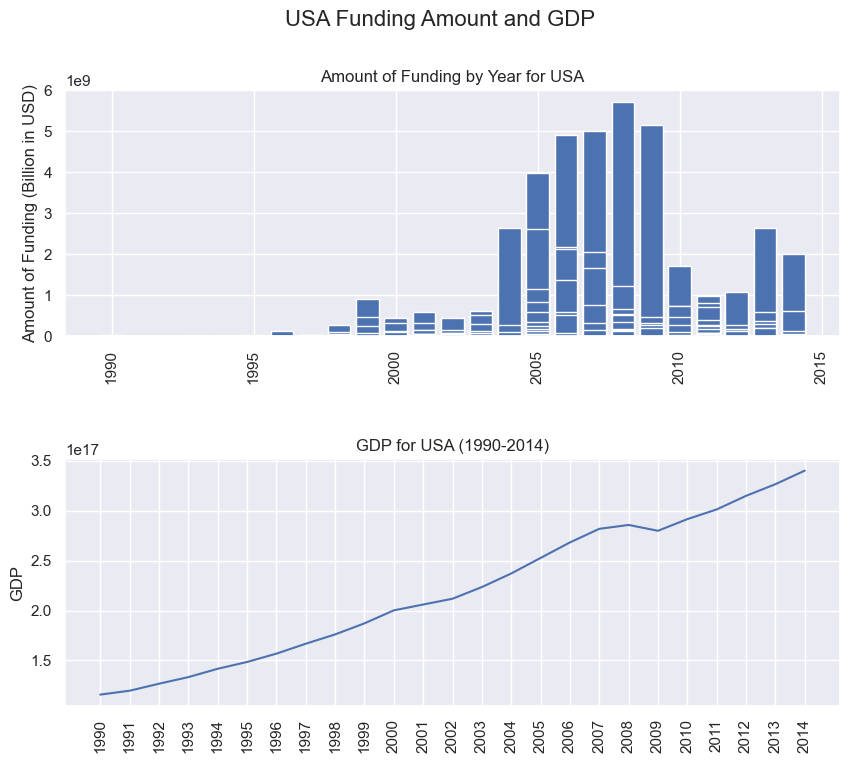

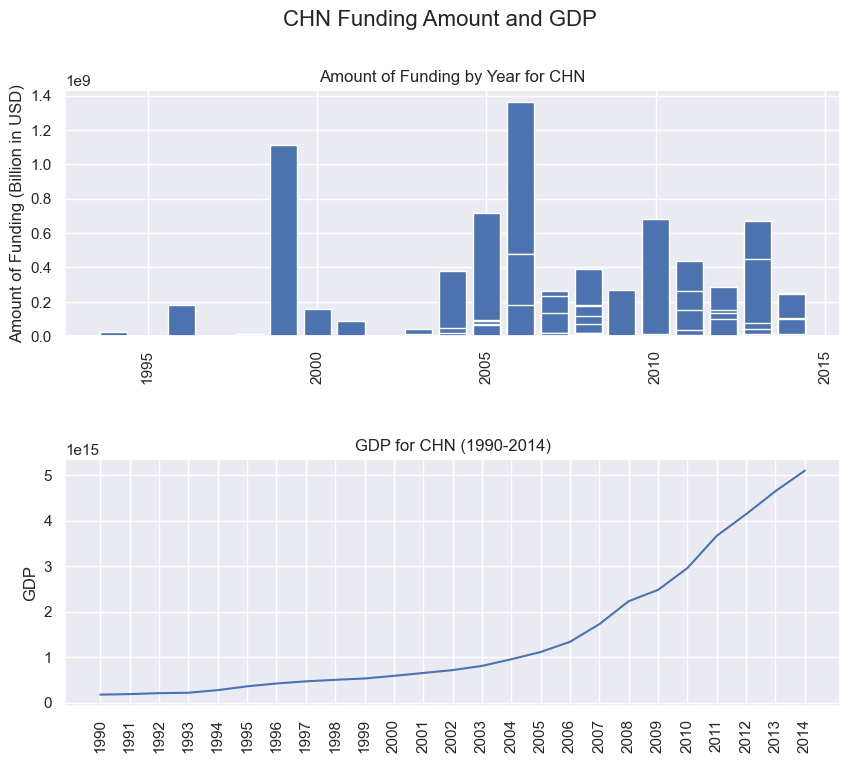

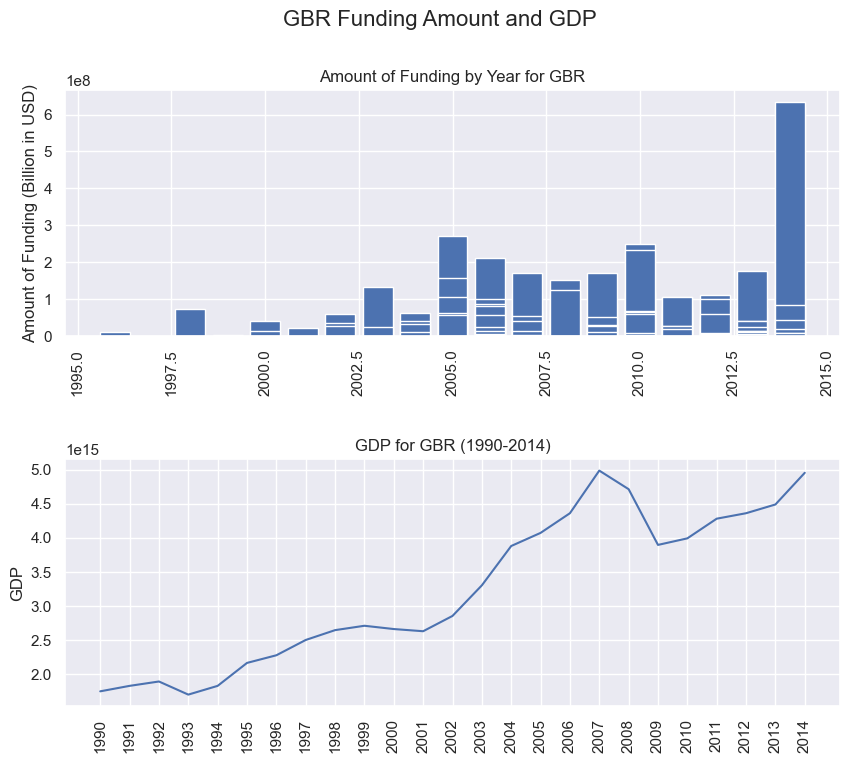

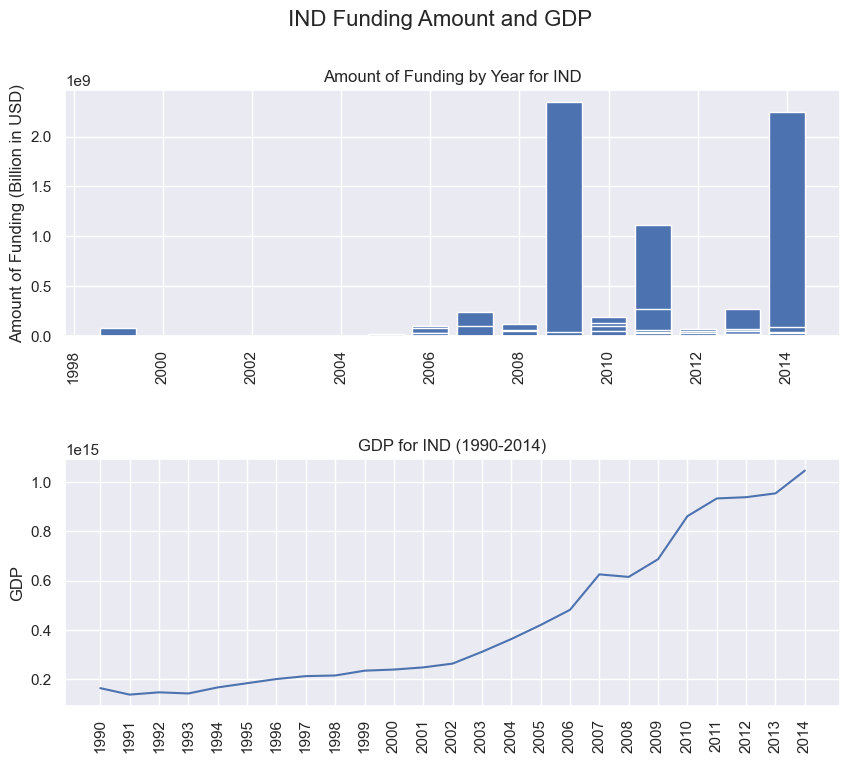

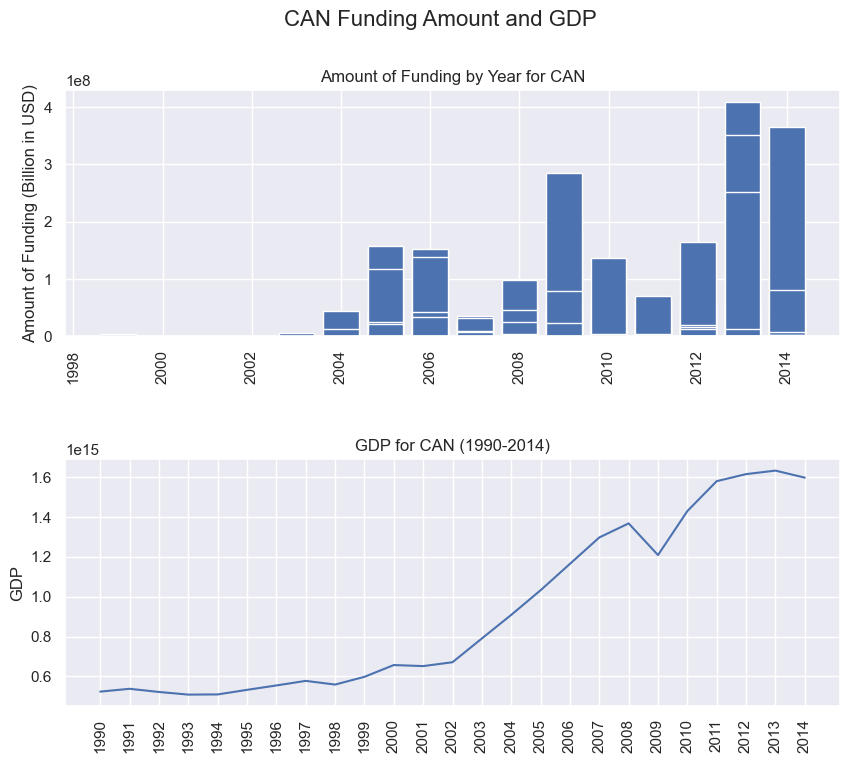

In [36]:
# List of country codes to plot
countries = ["USA", "CHN", "GBR", "IND", "CAN"]

# Loop through the country codes and plot the data for each country
for country in countries:
    # Filter the rows for the current country code
    country_funding = country_funding_per_year[country_funding_per_year['country_code'] == country]
    country_gdp = merged_df_gdp[merged_df_gdp['country_code'] == country]

    # Extract the years and project counts as lists
    funding_years = country_funding['first_funding_at'].tolist()
    funding_counts = country_funding['funding_total_usd'].tolist()

    # Get the inflation rates as a list
    gdp_years = list(country_gdp.columns[2:])
    gdp_rates = country_gdp.values.tolist()[0][2:]

    # Create a new figure with subplots for the project counts and inflation rates
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.subplots_adjust(hspace=0.5)

    # Plot the project counts by year
    ax1.bar(funding_years, funding_counts)
    ax1.set_title(f'Amount of Funding by Year for {country}')

    # Rotate the x-axis labels for better visibility
    ax1.tick_params(axis='x', rotation=90)

    # Set the y-axis label
    ax1.set_ylabel('Amount of Funding (Billion in USD)')

    # Plot the inflation rates over the years
    ax2.plot(gdp_years, gdp_rates)
    ax2.set_title(f'GDP for {country} (1990-2014)')

    # Rotate the x-axis labels for better visibility
    ax2.tick_params(axis='x', rotation=90)

    # Set the y-axis label
    ax2.set_ylabel('GDP')


    # Set the overall title of the figure
    fig.suptitle(f'{country} Funding Amount and GDP', fontsize=16)
    
    # Display the figure
    plt.show()

### Employment rate
Another factor that could potentially affect the funding amounts for starts-ups is the employment rate. It is possible that employment rate could be correlated with other variables that are more strongly related to startup funding. For example, a high employment rate could indicate a strong and growing economy, with higher levels of consumer spending and investment activity. This could create a more favorable environment for startups seeking funding, as investors may be more willing to invest in promising startups that are likely to benefit from the economic growth. The employment rate data will be further analyzed in this section (International Labour Organization, n.d.)

In [37]:
# Import the employment rate dataset
emp = pd.read_csv("../data/employment_rate.csv", sep=';')
emp = emp.rename(columns={'Country Code': 'country_code'})

In [38]:
# Match unique countries with employment level
countries = pd.DataFrame(data=['USA', 'CHN', 'GBR', 'IND', 'CAN'], columns = ['country_code'])
emp_countries = countries.merge(emp, on='country_code', how='left')
emp_countries.head(5) # no data on 1990

country_code  1990    1991    1992    1993   1994   1995   1996   1997  \
0          USA   NaN   6.800   7.500   6.900   6.12  5.650  5.450  5.000   
1          CHN   NaN   2.370   2.370   2.690   2.90  3.000  3.120  3.230   
2          GBR   NaN   8.550   9.770  10.350   9.65  8.690  8.190  7.070   
3          IND   NaN   6.737   6.815   6.798   6.83  7.014  7.181  7.279   
4          CAN   NaN  10.320  11.200  11.380  10.40  9.490  9.620  9.100   

    1998  ...  2005   2006   2007   2008   2009   2010   2011   2012   2013  \
0  4.510  ...  5.08  4.620  4.620  5.780  9.250  9.630  8.950  8.070  7.370   
1  3.240  ...  4.52  4.430  4.350  4.590  4.720  4.530  4.550  4.580  4.600   
2  6.200  ...  4.75  5.350  5.260  5.620  7.540  7.790  8.040  7.880  7.520   
3  7.487  ...  8.70  8.625  8.536  8.354  8.384  8.319  8.168  8.095  8.037   
4  8.280  ...  6.76  6.320  6.040  6.140  8.340  8.060  7.510  7.290  7.070   

    2014  
0  6.170  
1  4.630  
2  6.110  
3  7.981  
4  6.910  

[5 rows x 26 columns]

#### Employment Rate for the Top 5 Markets
The graph below depicts the employment rate over the top 5 geographical markets. Canada and India generally have the highest employment rate, followed by the USA and Great Britain. China has an overall lower employment rate. This is interesting considering that the total funding amount for Cananda and India is lower compared to the other three countries. 

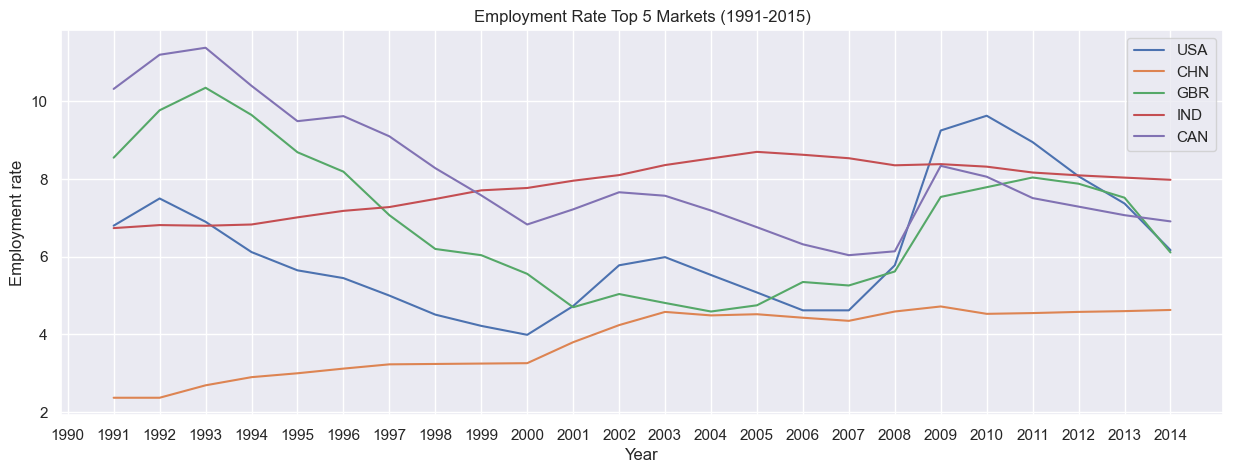

In [39]:
# Plot countries and employment rate
# Change size of plot
plt.figure(figsize=(15,5))

# Create a line plot with a line for each country
for i in range(len(emp_countries)):
    plt.plot(emp_countries.columns[1:], emp_countries.iloc[i, 1:], label=emp_countries.iloc[i, 0])
    
# Add x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Employment rate')

# Add a legend
plt.legend(loc='upper right')
plt.title(f'Employment Rate Top 5 Markets (1991-2015)')

# Show the plot
plt.show()

#### Funding Total Amount against Employment  Rate for the Top 5 Markets
The following graphs show the Funding Total Amount in USD against the Employment Rate for the Top 5 markets. Based on the graphs, it seems like employment rate by itself is unlikely to be a strong predictor of funding amounts for startups, as the relationship between the two variables is not straightforward. 

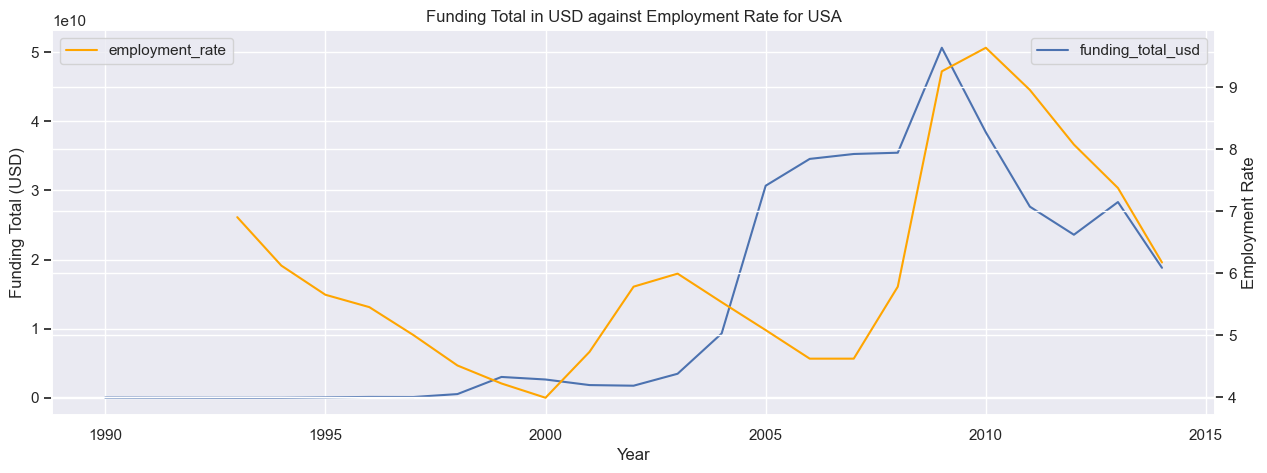

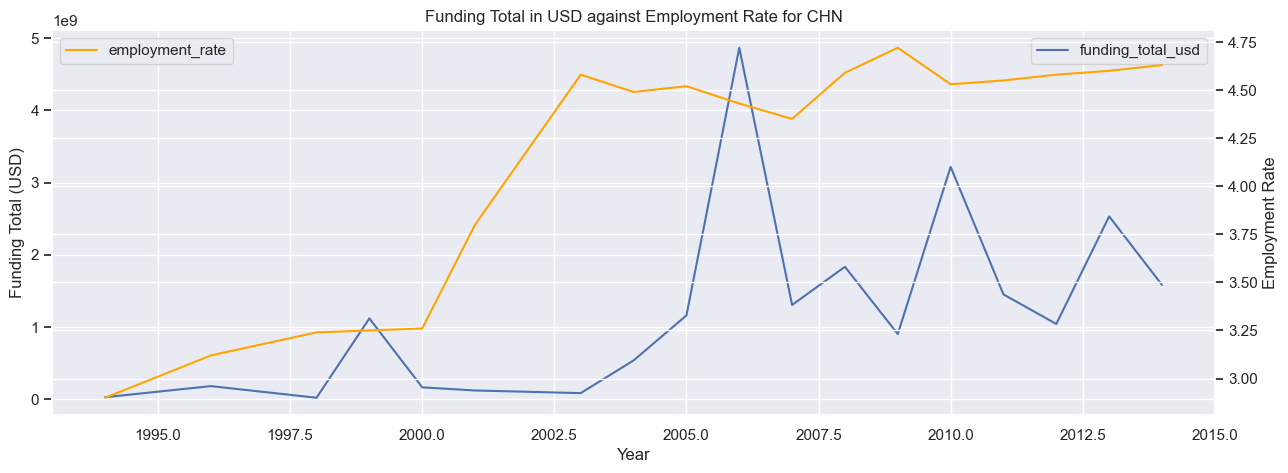

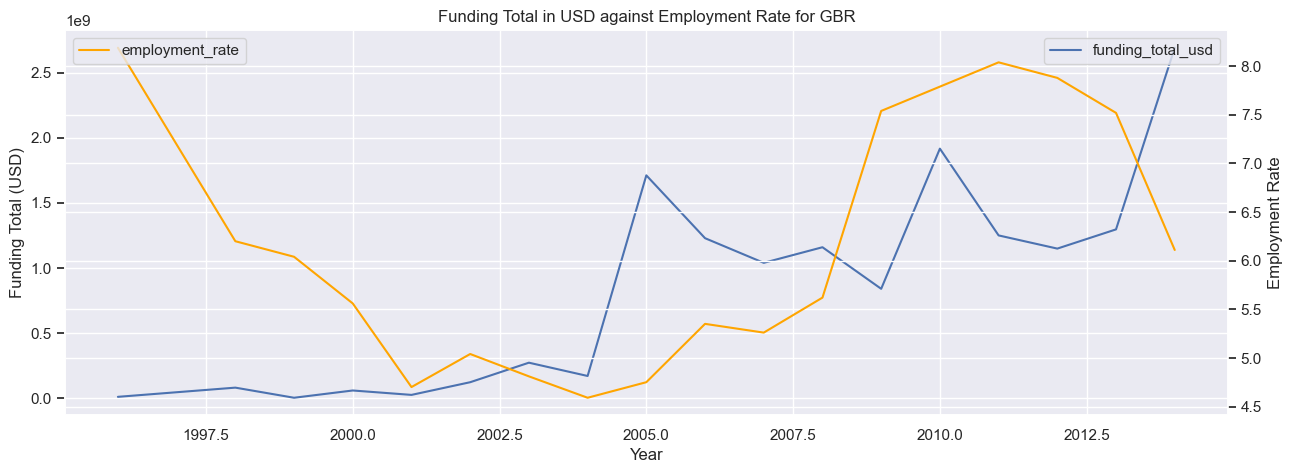

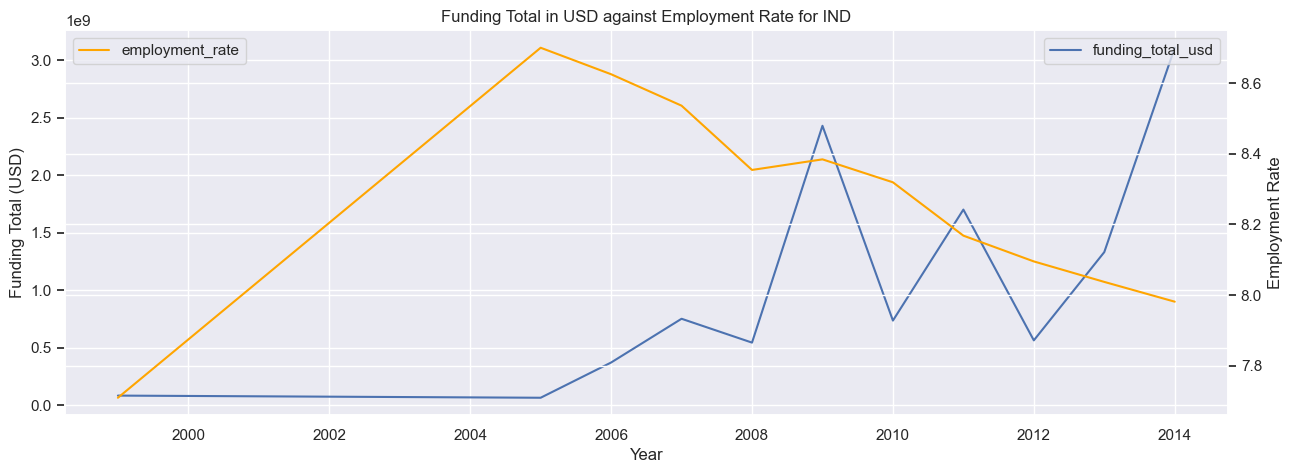

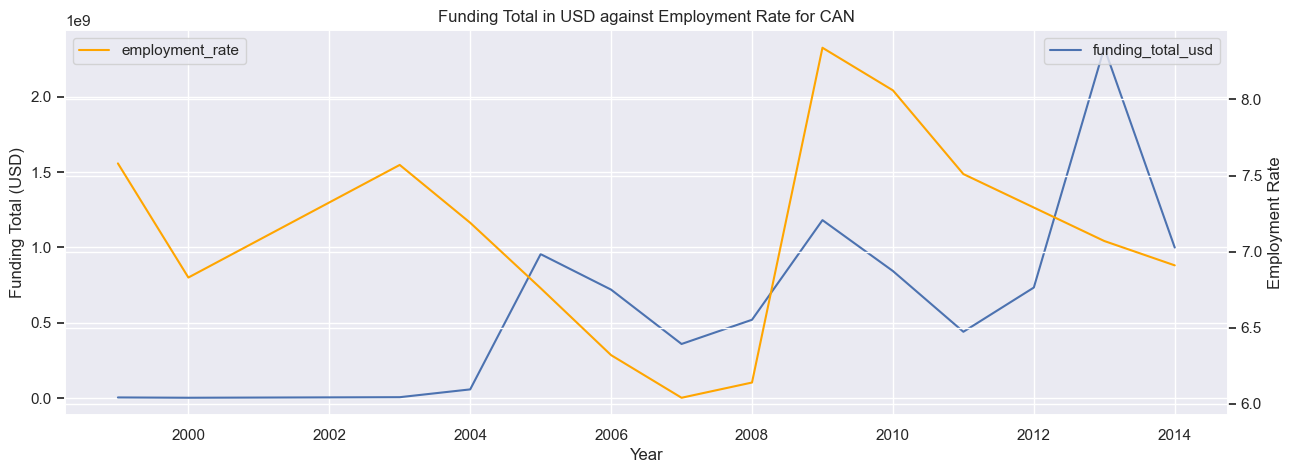

In [40]:
# match unique countries with employment rate
countries = ["USA", "CHN", "GBR", "IND", "CAN"]

for country in emp_countries['country_code']:
    # Filter the rows for the current country code
    country_emp = emp_countries[emp_countries['country_code'] == country]
    country_emp = (country_emp.set_index('country_code')).T
    country_emp = country_emp.reset_index().rename(columns={'index': 'country_code'})
    country_emp = country_emp.rename(columns={"country_code": 'year', country: 'employment_rate'})
    country_emp['year'] = country_emp['year'].astype(int)
    
    # Get country specific funding
    country_funding = country_funding_per_year[country_funding_per_year['country_code'] == country]
    country_funding_grouped = pd.DataFrame(country_funding.groupby(['first_funding_at', 'country_code']).agg({'funding_total_usd': 'sum'}))
    merged_df = pd.merge(country_funding_grouped, country_emp, left_on='first_funding_at', right_on='year', how='inner')
    
    # Create the figure and axes object
    fig, ax1 = plt.subplots(figsize=(15, 5))
    ax2 = ax1.twinx() # create a second y-axis on the same x-axis

    # Plot the bar chart on the first axis
    merged_df.plot(
        x='year', 
        kind='line',
        y='funding_total_usd', 
        ax=ax1, 
    )

    # Plot the line chart on the second axis
    merged_df.plot(
        x='year', 
        kind='line',
        y='employment_rate', 
        ax=ax2, 
        color='orange'
    )

    # Set the axis labels and titles
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Funding Total (USD)')
    ax2.set_ylabel('Employment Rate')
    plt.title(f'Funding Total in USD against Employment Rate for {country}')
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')


    # Show the plot
    plt.show()

### Education level
A higher education level could be important for predicting startup funding for several reasons. It can indicate specialized technical expertise, entrepreneurial training, credibility, problem-solving skills, and industry connections, which can all increase a founder's likelihood of success in attracting investors and securing funding. Hence, we will take a closer look at the education level of the top 5 countries in the period 1990-2015 (United Nations Development Programme, n.d.)

In [41]:
# Import the education level dataset
ed = pd.read_csv("../data/education_level.csv")
ed = ed.rename(columns={'iso3': 'country_code', 'mys_f_1990': '1990', 'mys_f_1991': '1991', 'mys_f_1992': '1992', 'mys_f_1993': '1993', 'mys_f_1994': '1994', 'mys_f_1995': '1995', 'mys_f_1996': '1996', 'mys_f_1997': '1997', 'mys_f_1998': '1998', 'mys_f_1999': '1999', 'mys_f_2000': '2000', 'mys_f_2001':'2001', 'mys_f_2002':'2002', 'mys_f_2003':'2003', 'mys_f_2004':'2004', 'mys_f_2005':'2005', 'mys_f_2006':'2006', 'mys_f_2007':'2007', 'mys_f_2008':'2008', 'mys_f_2009':'2009', 'mys_f_2010':'2010', 'mys_f_2011':'2011', 'mys_f_2012':'2012', 'mys_f_2013':'2013', 'mys_f_2014':'2014'})
ed.head(5)

country_code      1990      1991      1992      1993      1994      1995  \
0          AFG  0.342503  0.371860  0.401218  0.430575  0.459933  0.489290   
1          AGO       NaN       NaN       NaN       NaN       NaN       NaN   
2          ALB  6.692814  6.696486  6.700158  6.703831  6.707503  6.711175   
3          AND       NaN       NaN       NaN       NaN       NaN       NaN   
4          ARE  5.898316  6.237418  6.576520  6.748455  7.059660  7.370864   

       1996      1997      1998  ...      2005       2006       2007  \
0  0.518647  0.548005  0.577362  ...  0.815483   0.841579   0.867674   
1       NaN       NaN       NaN  ...  2.579449   2.640856   2.702263   
2  6.997617  7.284058  7.570499  ...  8.541899   8.618576   8.695253   
3       NaN       NaN       NaN  ...  9.964730  10.368560  10.396180   
4  7.622699  7.874534  8.126368  ...  9.336169   9.362231   9.388292   

        2008       2009       2010       2011       2012       2013       2014  
0   0.893770   0.919865   0.945961   1.011199   1.076438   1.141677   1.206915  
1   2.763669   2.825076   2.886483   2.947890   3.009297   3.070703   3.132110  
2   8.771930   8.980110   9.188290   9.396470   9.832490  10.077895  10.329424  
3  10.423800  10.451420  10.479040  10.506660  10.534280  10.561900  10.589520  
4   9.414354   9.440415   9.466477   9.492538   9.518600   9.544661   9.570723  

[5 rows x 26 columns]

In [42]:
# Match unique countries with education level
countries = pd.DataFrame(data=['USA', 'CHN', 'GBR', 'IND', 'CAN'], columns = ['country_code'])
ed_countries = countries.merge(ed, on='country_code', how='left')
ed_countries.head(5) 

country_code       1990       1991       1992       1993       1994  \
0          USA  12.880528  12.923876  12.967224  13.010572  13.053920   
1          CHN   3.420897   3.603620   3.786343   3.969066   4.151789   
2          GBR   9.625041   9.702265   9.779488   9.900342   9.978968   
3          IND   1.793045   1.841278   1.889512   1.937746   1.985980   
4          CAN  10.587957  10.770370  10.955925  11.141480  11.327035   

        1995       1996       1997       1998  ...       2005       2006  \
0  13.026117  12.998314  12.970511  12.942708  ...  12.796250  12.912390   
1   4.334512   4.525612   4.716711   4.907811  ...   5.753005   5.851038   
2  10.057594  10.182086  10.306577  10.431068  ...  11.837603  12.123715   
3   2.034214   2.296355   2.558496   2.820637  ...   3.040836   3.179246   
4  11.512590  11.698145  11.883700  12.069255  ...  13.144704  13.274400   

        2007       2008       2009       2010       2011       2012  \
0  12.949250  12.986110  13.007680  13.063680  13.103880  13.136740   
1   5.949071   6.047104   6.145137   6.243170   6.369998   6.496826   
2  12.409826  12.695938  12.982050  13.119410  13.080410  13.270820   
3   3.317657   3.456067   3.594478   3.732888   4.045360   4.357832   
4  13.331024  13.387648  13.444272  13.500896  13.557520  13.601984   

        2013       2014  
0  13.205990  13.246840  
1   6.623655   6.750483  
2  12.748950  12.838130  
3   4.670304   4.982776  
4  13.646448  13.690912  

[5 rows x 26 columns]

#### Education Level Top 5 Markets
The graph below depicts the employment rate over the top 5 geographical markets. The USA, Great Britain and Canada generally have the highest education level. There is a significant gap between the education level of these countries, and China and India, as shown in the graph.

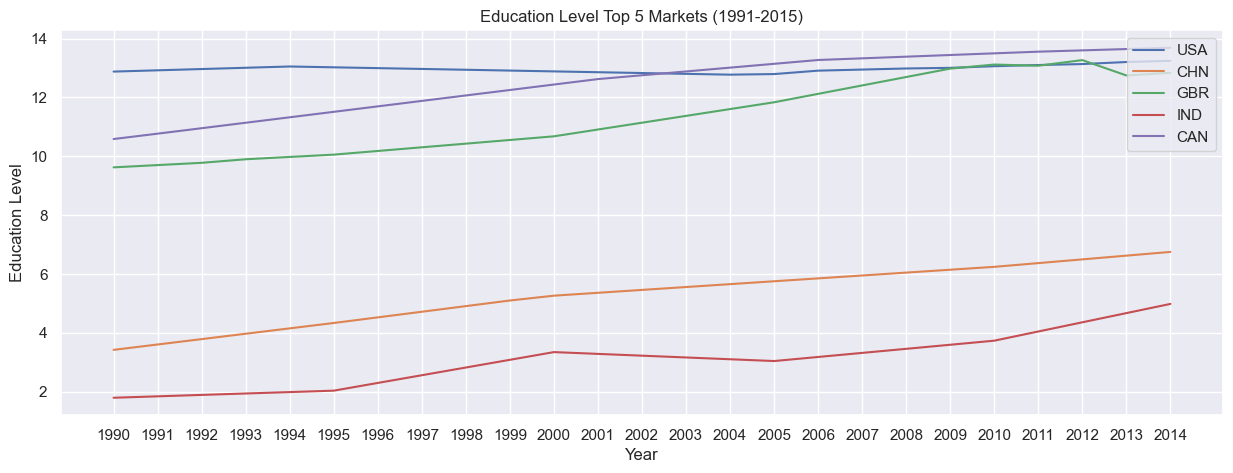

In [43]:
# Plot countries and education level
# Change size of plot
plt.figure(figsize=(15,5))

# Create a line plot with a line for each country
for i in range(len(emp_countries)):
    plt.plot(ed_countries.columns[1:], ed_countries.iloc[i, 1:], label=ed_countries.iloc[i, 0])
    
# Add x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Education Level')

# Add a legend
plt.legend(loc='upper right')
plt.title(f'Education Level Top 5 Markets (1991-2015)')

# Show the plot
plt.show()

#### Funding Total Amount against Education Level for the Top 5 Markets
The following graphs show the Funding Total Amount in USD against the Employment Rate for the Top 5 markets.

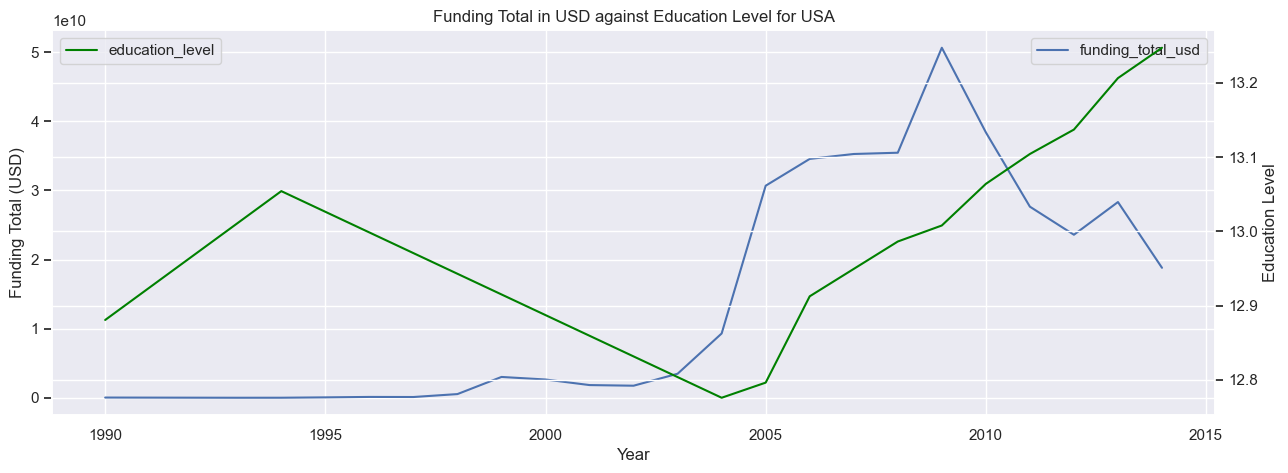

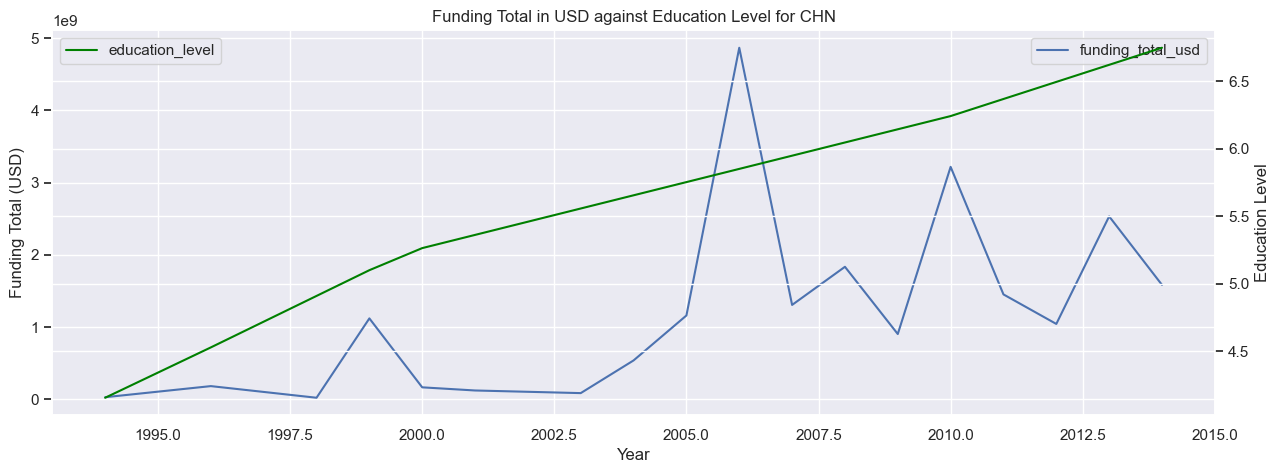

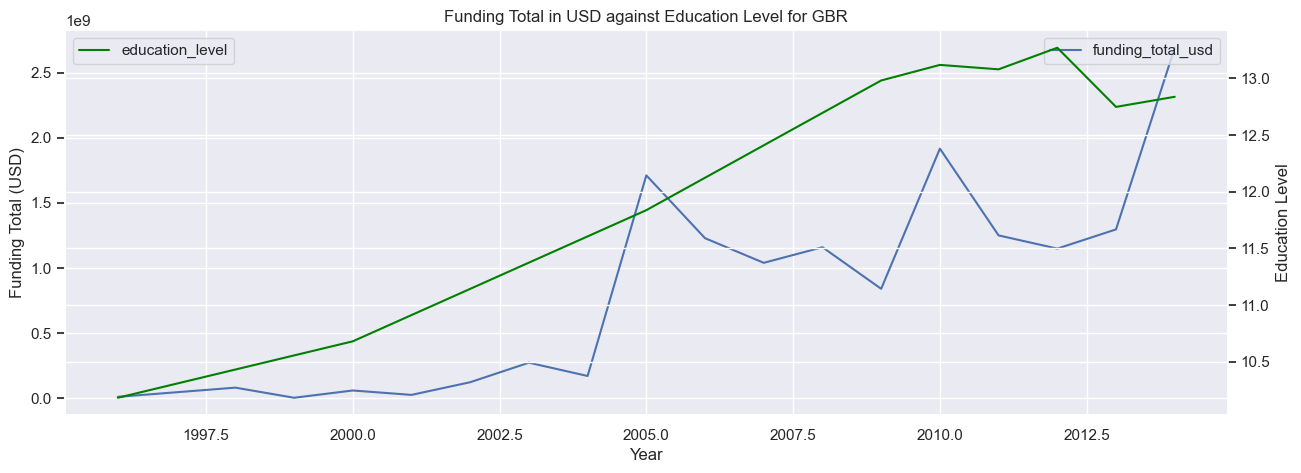

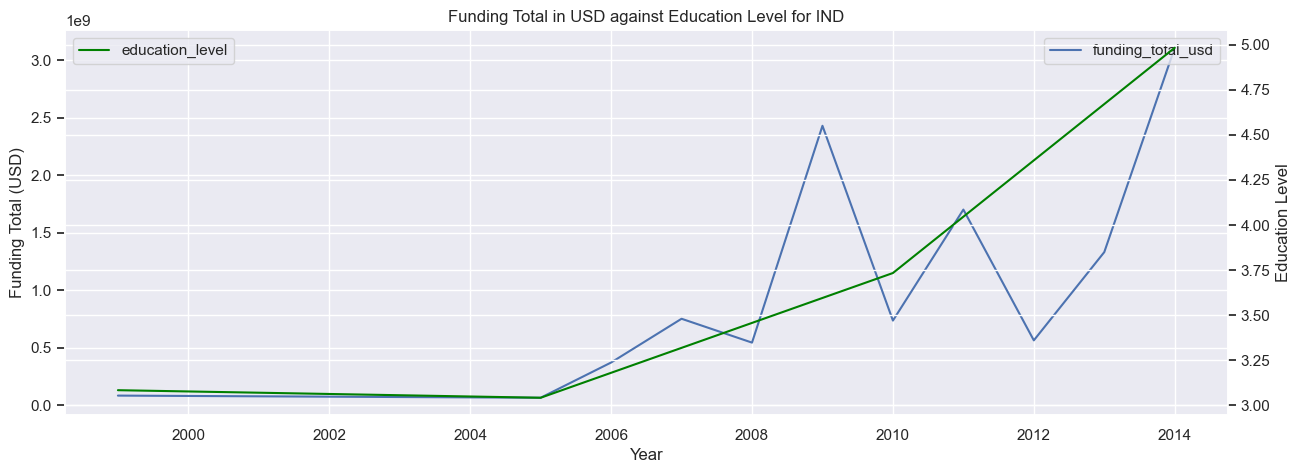

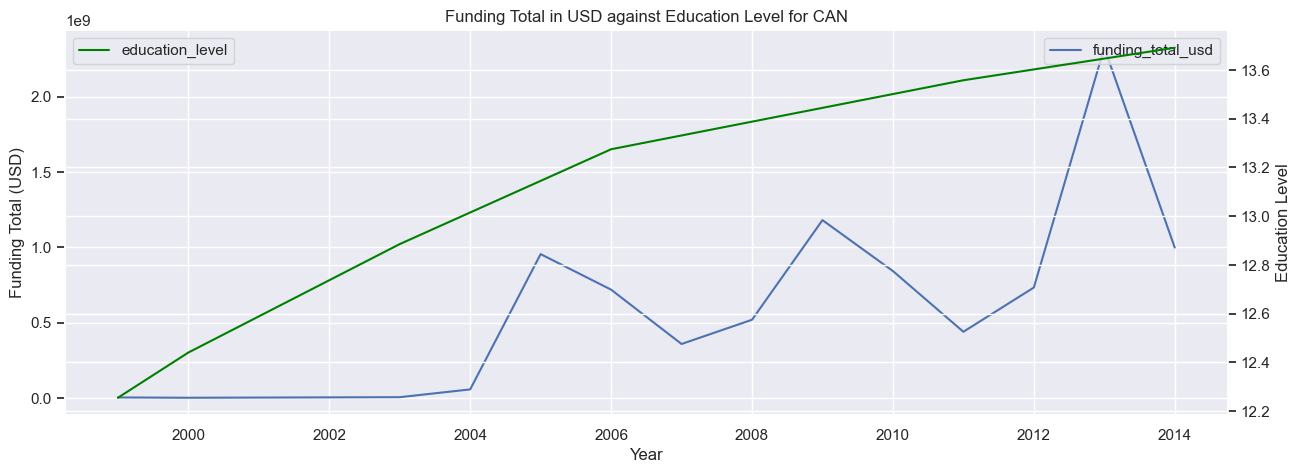

In [44]:
# match unique countries with employment level
countries = ["USA", "CHN", "GBR", "IND", "CAN"]

for country in emp_countries['country_code']:
    # Filter the rows for the current country code
    country_ed = ed_countries[ed_countries['country_code'] == country]
    country_ed = (country_ed.set_index('country_code')).T
    country_ed = country_ed.reset_index().rename(columns={'index': 'country_code'})
    country_ed = country_ed.rename(columns={"country_code": 'year', country: 'education_level'})
    country_ed['year'] = country_ed['year'].astype(int)
    
    # Get country specific funding
    country_funding = country_funding_per_year[country_funding_per_year['country_code'] == country]
    country_funding_grouped = pd.DataFrame(country_funding.groupby(['first_funding_at', 'country_code']).agg({'funding_total_usd': 'sum'}))
    merged_df = pd.merge(country_funding_grouped, country_ed, left_on='first_funding_at', right_on='year', how='inner')
    
    # Create the figure and axes object
    fig, ax1 = plt.subplots(figsize=(15, 5))
    ax2 = ax1.twinx() # create a second y-axis on the same x-axis

    # Plot the bar chart on the first axis
    merged_df.plot(
        x='year', 
        kind='line',
        y='funding_total_usd', 
        ax=ax1, 
    )

    # Plot the line chart on the second axis
    merged_df.plot(
        x='year', 
        kind='line',
        y='education_level', 
        ax=ax2, 
        color='green'
    )

    # Set the axis labels and titles
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Funding Total (USD)')
    ax2.set_ylabel('Education Level')
    plt.title(f'Funding Total in USD against Education Level for {country}')
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')
    
    # Show the plot
    plt.show()

## Summary
> The analysis shows that the **USA** is the dominant geographical market, receiving **76.6%** of the total funding. The runner ups take on a significantly smaller share; **China, Great-Britain, India, and Canada** have received respectively **76.6%, 4.9%, 3.3%, 2.6%, and 2.0%** of the funding total. This might be explained by USA data being much more publicly available as compared to the other countries.

> Looking at the markets in terms of industries, the overall market that receive the most funding for startups is **Biotechnology**, followed by **Software**, **Clean Technology**, **Health Care**, and **E-Commerce**. This indicates that these markets are highly attractive for investors, potentially due to their potential for innovation, growth, and profitability. There are differences within the top 5 countries and their most popular markets. The most popular market in the USA is **Biotechnology**, in China it's **E-Commerce**, in Great Britain it's **Mobile**, in India it's **Online Shopping** and lastly, in Canada it's **Clean Technology**. Interestingly, all of these categories are technology related.

> Considering the funding amount over the years, it's apparent that the popularity for start-ups has seen a slow start, but rapidly expands after **2005**. Especially after the economic crisis in 2008, the funding for start-ups peaks around **2009-2010** with funding totals above **$50 billion**. During this time period, the most popular market was **Biotechnology**. 

> Zooming in on the USA, **California** is the state that received the most funding by far, taking up almost half of the total funding amount in the USA with **46%**. Followed by **New York**, **Massachusetts**, **Texas** and **Washington**, with respectively 8.9%, 8.8%, 5.2% and 4.2%. This comes at no surprise, since California is home to Silicon Valley, the global tech and entrepreneurial hub. **Biotechnology** is the most popular market for California, New York and Massachusetts. For Texas, it's **Clean Technology** and for Washington it is **Internet**


## Bibliography
- Belayet Hossain. (2023). <i>Global Inflation Dataset - (1970~2022)</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/5040202
- Friedman, J. (2019). <i>How Biotech Startup Funding Will Change in the Next 10 Years.</i> https://www.ycombinator.com/blog/how-biotech-startup-funding-will-change-in-the-next-10-years/
- International Labour Organization. (n.d.). <i>Unemployment, total (% of total labor force) (modeled ILO estimate)</i> [Dataset]. https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS
- United Nations Development Programme. (n.d.). <i>Human Development Index and components</i> [Dataset]. https://hdr.undp.org/data-center/documentation-and-downloads
- World Bank Open Data. (n.d.). <i>GDP (current US$)</i> [Data set]. World Bank Open Data. https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
